In [ ]:
# prompt: Mount drive, and copy output.zip in the drive to /content.

from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/My\ Drive/output.zip /content/

Mounted at /content/drive


In [ ]:
!pip install torch numpy pandas transformers datasets peft trl bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.3/366.3 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
class Config:
    num_epochs = 10
    data_len = 4
    need_random = True

config = Config()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = 'cpu'
print(device)

cuda


In [ ]:
!unzip output.zip

Archive:  output.zip
   creating: output/
  inflating: __MACOSX/._output       
  inflating: output/.DS_Store        
  inflating: __MACOSX/output/._.DS_Store  
   creating: output/top5gub/
  inflating: __MACOSX/output/._top5gub  
   creating: output/top5underwear/
  inflating: __MACOSX/output/._top5underwear  
   creating: output/top5shoe/
  inflating: __MACOSX/output/._top5shoe  
   creating: output/top5acc/
  inflating: __MACOSX/output/._top5acc  
   creating: output/top5gfb/
  inflating: __MACOSX/output/._top5gfb  
   creating: output/top5glb/
  inflating: __MACOSX/output/._top5glb  
   creating: output/top5gub/processed_2020-week20/
  inflating: __MACOSX/output/top5gub/._processed_2020-week20  
   creating: output/top5gub/processed_2020-week18/
  inflating: __MACOSX/output/top5gub/._processed_2020-week18  
   creating: output/top5gub/processed_2020-week27/
  inflating: __MACOSX/output/top5gub/._processed_2020-week27  
   creating: output/top5gub/processed_2020-week11/
  inflating:

In [ ]:
import json
import os
week_set = [f"20{(37+i)//52+18}-week{(37+i)%52+1}" for i in range(0, 106)]
abbr_set = ["acc", "gfb", "glb", "gub", "shoe", "underwear"]
abbr_set_complete = ["accessories", "garment full body", "garment lower body", "garment upper body", "shoes", "underwear"]
text_dict = {}
%cd /content/output/
for week in week_set:
  text_dict[week] = {}
  for i, abbr in enumerate(abbr_set):
    if os.path.exists(f"top5{abbr}/processed_{week}/top5{abbr}_{week}_descriptions.json"):
      with open(f"top5{abbr}/processed_{week}/top5{abbr}_{week}_descriptions.json", "r") as f:
        text_dict[week][abbr_set_complete[i]] = json.load(f)
    else:
      text_dict[week][abbr_set_complete[i]] = {}
    print(text_dict[week][abbr_set_complete[i]])



/content/output
{'0633148001': ['Black, velvet-like fabric; silver embroidery; ribbed collar; button closure; intricate detailing.', 'Black wool cap with silver button, ribbon, and intricate embroidery.', 'Protective cap for head, featuring a distinctive badge as part of its design.'], '0647462001': ['Sleek, modern, stylish handbag with black leather and gold accents.', 'Leather, black.', 'Carry items, hands free.'], '0705143002': ['Sweater with intricate knitting pattern, ribbed cuffs and neckline, gray color.', 'Grey, knitted, soft fabric with intricate detailing.', 'Warmth.'], '0179950001': ['Sleek, modern leather belt with silver buckle.', 'Leather, black.', 'Hold pants up.'], '0684033003': ['Sleek, modern, minimalist.', 'Black, knit fabric with slight sheen.', 'Casual wear, neckline coverage.']}
{'0510126016': ['Striped, short-sleeved blouse with button closure.', 'Striped black shirt with collar, short sleeves, and ruffle hem.', 'Casual shirt for dressing up or down.'], '06715020

In [ ]:
# prompt: According to embed_dict, build a basic torch dataset.

from torch.utils.data import Dataset
import random

random.seed(1126)

class TextDataset(Dataset):
    def __init__(self, text_dict, week_set):
        self.week_set = week_set
        self.week_dict = {week: i for i, week in enumerate(self.week_set)}
        self.abbr_set = list(text_dict[self.week_set[0]].keys())
        self.abbr_dict = {abbr: i for i, abbr in enumerate(self.abbr_set)}
        self.data = []
        for week in self.week_set[config.data_len:]:
            for abbr in self.abbr_set:
                valid_text = ""
                for prod in text_dict[week][abbr]:
                    for num in range(3):
                        valid_text += text_dict[week][abbr][prod][num] + " "
                    valid_text = valid_text[:-1] + "/"
                valid_text += "End of prediction."

                self.data.append({
                    "week": week,
                    "abbr": abbr,
                    "valid_text": valid_text,
                  })
        self.text_dict = text_dict
    def __len__(self):
        return len(self.data)*config.num_epochs


    def __getitem__(self, idx):
        query = "Below are the descriptions for the previous top 5 best-sellers of each types."
        item = self.data[idx//config.num_epochs]
        prev_len = random.randint(config.data_len//2, config.data_len+1)
        for i in range(self.week_dict[item["week"]]-prev_len, self.week_dict[item["week"]]):
            abbr = item["abbr"]
            query += f"Best sellers in {self.week_set[i]}: "
            prod_set = list(self.text_dict[self.week_set[i]][abbr].keys())
            if config.need_random:
                random.shuffle(prod_set)
            for j, prod in enumerate(prod_set):
                query += f"{self.text_dict[self.week_set[i]][abbr][prod][0]}, {self.text_dict[self.week_set[i]][abbr][prod][1]}, {self.text_dict[self.week_set[i]][abbr][prod][2]}/"
            query += "End of prediction."
        query += f"You are a best seller predictor, and above are the descriptions for the previous top 5 best-sellers of each types. Do your best to predict the description of the best sellers of {item['abbr']} in {item['week']} based on the previous information. One minimun and five maximum. Split the description with '/' and end the response in 'End of prediction.' "
        response = f"{item['valid_text']}"


        output = {"text": f"""USER: {query}\nASSISTANT: {response}""",
                  "week": item["week"],
                  "abbr": item["abbr"],
                  }



        return output

# Instantiate the dataset
train_dataset = TextDataset(text_dict, week_set[:75])
test_dataset = TextDataset(text_dict, week_set[75:])
print(train_dataset.data[102])
print(test_dataset.data[102])

seq_beforeHug = {
    "train": [],
    "test": []
}
for i in range(len(train_dataset)):
  seq_beforeHug["train"].append({"text": train_dataset[i]["text"]})
for i in range(len(test_dataset)):
  seq_beforeHug["test"].append({"text":test_dataset[i]["text"]})


{'week': '2019-week7', 'abbr': 'accessories', 'valid_text': 'Elegant, delicate, gold-toned earrings with dainty designs. Gold, silver, copper. Earrings for accessory./Leopard print, rectangular scarf. Animal print, dark brown. Throw blanket with animal print design, decorative and functional./Chic, vintage-inspired sunglasses with animal print accents. Tortoiseshell, brown. Sunglasses protect eyes from sunlight, enhance vision./Straw handbag with leather handles, woven texture. Straw, brown leather straps. Handbag for carrying personal items./Sleek, minimalist leather handbag with modern hardware. Black leather, brown handles. Carrying bag./End of prediction.'}
{'week': '2020-week30', 'abbr': 'accessories', 'valid_text': 'Slim fit, black leather belt with gold buckle. Black leather belt with silver buckle. Hold pants up./Sleek, black purse with gold accents and chain strap. Black leather, gold hardware. Carry, store and organize personal items./Sleek, modern black belt with silver buck

In [ ]:
'''
import os
os.environ['CUDA_LAUNCH_BLOCKING']='1'
os.environ['TORCH_USE_CUDA_DSA']='1'
'''

"\nimport os\nos.environ['CUDA_LAUNCH_BLOCKING']='1'\nos.environ['TORCH_USE_CUDA_DSA']='1'\n"

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineG

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, BitsAndBytesConfig
from peft import get_peft_model, LoraConfig, TaskType
from trl import SFTTrainer
import datasets

tokenizer = AutoTokenizer.from_pretrained("lmsys/vicuna-7b-v1.5")

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)
model = AutoModelForCausalLM.from_pretrained("lmsys/vicuna-7b-v1.5", quantization_config=bnb_config)
tokenizer.pad_token = tokenizer.eos_token  # Important for training

peft_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.CAUSAL_LM
)

model = get_peft_model(model, peft_config)

OSError: meta-llama/Llama-3-8B is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [ ]:
train_dataset_hug = datasets.Dataset.from_list(seq_beforeHug["train"])
trainer = SFTTrainer(
    model=model,
    train_dataset=train_dataset_hug,  # Use Dataset format
    args=TrainingArguments(
        output_dir="/content/drive/MyDrive/vicuna-bestseller-lora-1abbr",
        per_device_train_batch_size=1,
        gradient_accumulation_steps=4,
        num_train_epochs=1,
        learning_rate=1e-4,
        logging_dir="./logs",
        fp16=True,
        save_strategy="steps",
        save_steps=1000
    )
)

trainer.train()

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, BitsAndBytesConfig
from peft import get_peft_model, LoraConfig, TaskType
from torch.utils.data import DataLoader

test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

tokenizer = AutoTokenizer.from_pretrained("lmsys/vicuna-7b-v1.5")

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)
model = AutoModelForCausalLM.from_pretrained("/content/drive/MyDrive/vicuna-bestseller-lora-1abbr/checkpoint-1065", quantization_config=bnb_config)
# model = AutoModelForCausalLM.from_pretrained("lmsys/vicuna-7b-v1.5", quantization_config=bnb_config)
model.eval() # Set the model to evaluation mode

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

In [ ]:
predictions = []
actuals = []
model.to(device)
runned = []

with torch.no_grad():
    for i in range(0, len(test_dataset)):
        data = [test_dataset[i]]
        input_data = [sentence.split("ASSISTANT:")[0]+"\nASSISTANT:" for sentence in data]
        inputs = tokenizer(input_data, return_tensors="pt", padding=True, truncation=True, max_length=25000).to(device)
        outputs = model.generate(**inputs, max_new_tokens=100, num_return_sequences=1)
        decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Extract the response part from the decoded output
        # This assumes your output format is "USER: query\nASSISTANT: response"
        response_start_index = decoded_output.find("ASSISTANT:")
        if response_start_index != -1:
            predicted_response = decoded_output[response_start_index + len("ASSISTANT:"):].strip()
            predictions.append(predicted_response)
        else:
            predictions.append("") # Handle cases where the format is unexpected

        # Extract the actual response from the original test data
        # This assumes the test data format is "USER: query\nASSISTANT: response"
        actual_response_start_index = data[0].find("ASSISTANT:")
        if actual_response_start_index != -1:
            actual_response = data[0][actual_response_start_index + len("ASSISTANT:"):].strip()
            actuals.append(actual_response)
        else:
            actuals.append("") # Handle cases where the format is unexpected
        print(f"Sample {i//13+1}:")
        print(f"  Predicted: {predicted_response}")
        print(f"  Actual:    {actual_response}")
        print("-" * 20)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 1:
  Predicted: Sleek, modern, minimalist. Leather belt with silver buckle. This is a belt, designed to be worn around the waist for holding pants up./Modern, minimalist, sleek. Leather belt with silver buckle. This is a belt for holding up pants./Black leather belt with silver buckle featuring a compass design. Black leather belt with silver buckle. Belt for holding
  Actual:    Artistic tapestry with vibrant colors and intricate patterns, featuring a mythical scene of a woman being carried by two birds. Colorful mosaic tile with intricate designs, depicting a woman in profile. Artistic expression./Black leather belt with silver buckle, studded edges, and metal loops for adjustment. Black leather belt with silver buckle. Belt for holding pants up./Modern, sleek leather belt with silver buckle. Leather belt with silver buckle. The black belt serves as a fashion accessory to hold up pants./Sleek, modern belt with gold rings and black leather. Black leather belt with gold rings. B

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 2:
  Predicted: Floral print, long sleeves, ruffled hem. Floral print, sheer fabric, flowy sleeves. Dress./White, lace-trimmed blouse with ruffled sleeves and neckline. White, lace trim. Casual, versatile top with ruffled sleeves./White, long-sleeved blouse with ruffled hem and tie at neckline. White, lace, silky. Cas
  Actual:    Teal, sleeveless, V-neck, ruched bodice, bow tie at neckline. Cotton, teal. Casual wear, fashionable look./Multi-colored, ornate pattern; long sleeves; high collar; asymmetrical hem. Mixed media, patterned. Artistic fashion statement./White, modern, stylish blazer with peaked collar and double-breasted front. White, tailored jacket with lapel. Dress jacket for formal occasions, versatile style suitable for business or special events./Floral print, bell sleeves, ruffled hem. Printed floral, vibrant pink and blue hues. Dress for special occasions./Cream colored, long-sleeved dress with button closure. Cotton, beige. Dress with collar, button-up front and

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 3:
  Predicted: Modern, slim-fit pants with button closure. Black, cotton-blend pants with button closure. Smart casual pants for men, versatile wear for work, dining, or leisure./Modern, slim fit pants with high waist. Black, stretchy fabric. Comfortable, versatile pants for daily wear./Classic denim jeans with faded wash, straight legs, belt loops, and button
  Actual:    Slim fit, heather gray pants with side seam pockets and zipper fly. Green, stretchy knit pants. Comfortable pants for daily wear./Black pants with button closure, straight leg. Black denim, button fly. Comfortable, versatile pants for everyday wear./Sleek, modern fit. Black, knit material. Comfortable, stretchy pants for casual wear./Blue denim pants, ripped knees, faded wash. Denim jeans, blue, worn, faded. Casual wear, denim style./Modern, slim fit leggings with ribbed waistband and hem for comfort. Black, stretchy material. Pair of black leggings for workout or casual wear./End of Prediction.
-------------

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 4:
  Predicted: Classic, sophisticated, double-breasted coat with peaked lapel and belted waist. Black, double-breasted coat with belt. Warmth, style, formal wear./Classic, sophisticated, double-breasted jacket with peaked lapel and buttoned front closure. Black, double-breasted jacket with white buttons. Business suit jacket./Classic, sophisticated, tailored look. Black, sh
  Actual:    Elegant, classic, sophisticated. Tan, white, black. Classic, versatile jacket for business or casual wear./Hoodie with a drawstring, ribbed cuffs and waistband, and a white tag. Cotton fleece, maroon. Warmth, comfort./Classic, warm, olive green jacket with double-breasted front, chest pockets, peaked lapels, and buttoned cuffs. Brown, textured fabric. Casual jacket with pockets, collar, and buttons./Chic, casual, button-up jacket with pockets. Cotton, white. Provides warmth, protection from wind and rain, and versatility for various outdoor activities./Elegant, tailored beige trench coat with be

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 5:
  Predicted: Black lace bra with spaghetti straps, black underwires. Black lace bra with black straps. Provides support for breasts, enhances cleavage, adds feminine touch to outfits./Black lace bra with black straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage, and is typically worn with a bra underneath./Black lace bra with black straps, set against
  Actual:    Black lace bra with scalloped trim, matching thong. Black lace lingerie with straps. Supports breasts, modesty, fashionable./Tank top, solid grey color, short sleeves, round neckline. Crew neck, ribbed hem, heather gray. Tank top for under clothing./Lace underwear with cutouts. Lace, black. Lingerie for women, lacey bottoms./Black lace bra with thin straps, v-neckline and scalloped edge detailing. Black, lace bra with black straps. Provides support, enhances cleavage./Bikini with bow tie, pink polka dots, white background. Lace, cotton, polka dots. Comfortable underwear for wome

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 6:
  Predicted: Sleek, modern, minimalist. Leather belt with silver buckle. This is a belt, designed to be worn around the waist for holding pants up./Modern, minimalist, sleek. Leather belt with silver buckle. This is a belt for holding up pants./Black leather belt with silver buckle featuring a compass rose pattern. Black leather belt with silver buckle. Belt with
  Actual:    Classic, sleek leather belt with silver buckle. Black leather with silver hardware. Belt with buckle for securing waistband of pants./Black leather belt with silver buckle, loops, and rivets. Leather, silver buckle. This is a black leather belt with silver buckle, suitable for casual or formal wear./Stylish, minimalist, sophisticated. Black leather belt with silver rings. Accessory for belt loops, to hold rings together./Black leather belt with gold rings, looped around itself. Black leather belt with gold rings. Leather belt with gold rings for holding pants up./Modern, sleek leather belt with large, si

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 7:
  Predicted: Floral print, long sleeves, ruffled hem. Floral print, floral color palette, long sleeves, ruffled hem, sheer fabric. Dress for formal event./Floral print, long sleeve, ruffled hem. Floral print, floral color palette, long sleeves, ruffled hem, short sleeves. Dress for formal events, parties or dates./White, v-neck
  Actual:    Polka dot dress with bow tie neckline. Dress made of polka dot fabric with black dots against a white background. Fashion garment for dressing up./Wrinkled beige dress with rolled up sleeves and a bow tie at waist. Cotton, off-white. Smart casual dress for women./Mid-length dress with green patterned fabric, fitted waist and flared skirt. Green, floral patterned dress. Dress for dressing./Solid black t-shirt with crew neckline, short sleeves, and ribbed neckband for comfort fit. Black, cotton. This black t-shirt is designed for casual wear, providing comfort and style./Floral pattern, ruffled sleeves, high neckline, tiered bodice, pleated 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 8:
  Predicted: Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Over
  Actual:    Classic, warm brown corduroy jacket with chic pockets and buttons. Brown corduroy jacket. Casual wear, versatile style./Classic, tailored, versatile. Tan, white tag. Professional attire for business meetings./Elegant, classic, crisp white collared shirt with long sleeves and button-down front. White, button-up shirt with collar. Dress shirt for men./Light blue blazer with double-breasted front, white collar and button placket, belted waist. Blue blazer with white collar. Lightweight, tailored jacket for professional or formal wear./Elegant, oversized trench coat with belt closure. Beige coat with gold 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 9:
  Predicted: Black, glossy leather loafer with gold buckle and tassel. Black leather with gold accents. Comfortable, stylish sandals for warm weather./Black, high-heeled sandal with ankle strap and open toe. Black suede, tan sole. Pair of black ankle boots for fashion, style, and protection./Modern, minimalist sandal with black straps and a single bead detail
  Actual:    Elegant, modern sandal with brown suede straps and silver accents. Leather straps, brown soles. Comfortable sandals for feet, made of leather straps with braided design./Elegant, feminine bow sandals with tan leather soles, adorned with a single gold emblem. Cream sandals with bow, tan straps, white soles. Baby sandals with bow./Stylish, minimalist wedge sandal with black sole and straps. Straw heel, black strap. Comfortable, casual sandal for walking./White, black, white sole. White, black. Footwear for walking, laced to secure foot./Black slides with black soles, white trim, and embossed text. Leather, bla

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 10:
  Predicted: Black lace bra with spaghetti straps, round neckline. Black lace bra with thin straps. Provides support for breasts during wearer' s daily activities./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage, and is typically worn with a bra underneath./Black lace bra with thin straps. Black lace bra with black straps. Provides
  Actual:    Modern, sleek, black tank top with distinctive white logo. Black, stretchy fabric with white logo. Supportive sports bra for women./Black lace underwear with a high cut waistband. Black lace underwear. Provides support and comfort during physical activity./Lace-trimmed thongs in white background. Lace, black. Wear under clothing, provide privacy./Black lace bra with adjustable straps, hanging from a white background. Black lace bra with black straps. Provides support for the female torso, offering modesty while being worn under clothing./Black tank top with crew neckli

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 11:
  Predicted: Floral patterned dress with ruffled sleeves, high neckline, and tie at waist. Floral pattern, pink and white. Dress for formal or semi-formal events, with long sleeves and intricate floral pattern./Floral print, long sleeve, ruffled hem. Floral print, floral color palette, long sleeves, ruffled hem, sheer fabric, vintage style. D
  Actual:    The dress is white, featuring ruffled sleeves and a high neckline with a black tag attached. Cotton blouse with ruffled sleeves. Blouse for formal events./Green floral dress with belted waist. Green, floral patterned dress with ties at neckline and waist. Dress for formal occasion./Long, loose-fitting dress with wide sleeves. Green dress with tie at waist. Green dress, formal, semi-formal wear./Polka dot dress, navy blue, V-neckline, tie at waist. Blue, white polka dot dress. Casual dress for women./Floral print, ruffled sleeves, v-neck. Floral print, floral colors. Casual, elegant, floral dress for women./End of Prediction

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 12:
  Predicted: Modern, slim-fit pants with button closure. Black, cotton-blend pants with button closure. Pants provide comfort, style, warmth./Denim jeans with faded wash, slim fit, button closure, distressed details. Denim, blue. Pair of blue jeans for casual wear, featuring a classic design with button closure./Classic, slim-fit jeans with a faded wash. Denim je
  Actual:    Distressed denim pants with faded blue wash, featuring a classic five pocket design, visible stitching, and slightly worn areas. Denim, light blue. Comfortable, casual wear for daily activities./Distressed denim shorts with frayed edges, worn-in look. Denim, white stitching. Denim shorts with frayed edges, metal rivets, and white stitching./Loose fit, faded blue, drawstring waistband, relaxed cuffs. Denim, light blue. Comfortable, versatile pants for daily wear./Denim shorts with rips, distressed look, belt loops, button closure. Denim shorts with distressed details, faded blue wash. Casual wear for wom

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 13:
  Predicted: Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black blazer with satin lapel, single button closure. Business suit for professional appearance./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored
  Actual:    Olive green button-up shirt with long sleeves, collar, and pocket detailing. Olive green, button-up shirt with collar. Long sleeve button-up shirt./Classic, formal, button-up shirt. White, button-up shirt with collar. Classic white collared shirt with long sleeves, versatile for casual or formal wear./Classic, simple, clean. White, button-up shirt with puffed sleeves. White blouse for women, casual or formal wear./White, off-the-shoulder top with ruffled hem. White, thin fabric. White crop top, loose fit with spaghetti straps, for casual wear or as a base layer under other clot

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 14:
  Predicted: White, flat-toe sandals with black straps and buckles. White, black, silver. Comfortable, stylish footwear for relaxation or vacation./Sleek, minimalist sandals with black straps and tan soles. Black, beige, white. Comfortable footwear for relaxation or vacation./Sleek, minimalist sandal with black straps and beige sole. Black, beige, white.
  Actual:    Adorable, fluffy white bow with tan trim on a flip-flop. Straw, white fabric, tan leather. Soft, cushioned sandal with bow for children./Stylish woven sandal with suede bow, beige straw base. Tan suede straps, beige straw sole. Comfortable, versatile sandal for footwear./Black leather sandals with quilted stitching, tagged. Leather, black. Leather padded footrest for comfort./Bow-shaped sandals with black soles, topped with a brown leather patch. Bows, fabric, leather. Comfortable sandals with bow tie closure./Sleek, modern black sandals with gold accents. Leather, black. Comfortable sandal with black leather st

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 15:
  Predicted: Black leather belt with silver buckle featuring a whale or dolphin logo. Leather belt with silver buckle. Belt with buckle for securing pants around waist./Sleek, modern, minimalist. Leather belt with silver buckle. This is a belt for holding up pants./Black leather belt with silver buckle featuring a compass rose pattern. Black leather belt with silver
  Actual:    Leather belt with silver buckle, adjustable fit. Black leather belt with silver buckle. Wear belt around waist to hold up pants./Sleek, modern belt with gold buckle. Black leather belt with silver buckle. Belt with buckle for waist./Classic, understated leather belt with silver rings. Black leather belt with silver metal rings. Hold rings together securely./Sleek, modern belt with gold rings for adjustment. Leather belt with gold rings. The belt is black with gold rings, suitable for formal or semi-formal wear to hold up pants./Leather belt with metal buckle, intricate design. Leather, silver buckle.

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 16:
  Predicted: Floral pattern, long sleeves, ruffled hem. Floral print, floral color palette, long sleeves, ruffled hem, sheer fabric. Dress for formal events, elegant evening wear./Floral print, long sleeve, ruffled hem. Floral print, floral color palette, long sleeves, ruffled hem, sheer fabric. Dress for formal events, elegant evening wear./Floral
  Actual:    Black and white zebra print. Zebra print, black & white. Zebra print coat for fashionable appearance./Black, long-sleeved blouse with button closure. Black, button-up blouse with rolled cuffs. Button-up blouse for dressing up or down./Classic, elegant, timeless fashion. Black, button-up dress with ties at waist. Formal wear for women, suitable for professional or formal events./Loose fit, long sleeve, high neckline, cinched waist with tie. Green dress with satin finish, tied at waist with ribbon. Dress for formal or semi-formal occasions, featuring a collarless neckline, tie belt, and long sleeves./Solid, fitted t-shi

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 17:
  Predicted: Distressed denim shorts with frayed edges, blue wash. Denim shorts with torn edges, blue color. Denim shorts for casual wear, style statement./Denim shorts with distressed details, high waist, button closure. Denim, blue. Denim shorts for summer wear./Denim shorts with distressed details, high waist, button closure. Denim, blue. Denim shorts for casual wear,
  Actual:    Classic, slim-fit pants with button closure. Black denim. Comfortable, versatile pants for everyday wear./Denim shorts with distressed detailing, frayed hem, and white stitching. Denim, distressed. Casual shorts for comfort, style, and ease of wear./Casual, comfortable fit. Blue denim, elastic waistband. Casual wear, comfort./Black, pleated skirt with a flared hem. Black, silky-feeling material with subtle ruffles. Skirt is designed to cover lower body, showcasing feminine fashion style./Distressed denim shorts with frayed hem. Denim shorts with worn, faded blue denim, white stitching, and brown

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 18:
  Predicted: Sleek, modern sandal with black straps and beige sole. Black, beige, white. Comfortable sandal for warm weather./Sleek, minimalist sandal with black straps and beige sole. Black, beige, white. Comfortable footwear for walking, standing, or relaxing indoors./Sleek, minimalist sandal with black straps and beige sole. Black, beige, white. Comfort
  Actual:    Cute sandals with bows, tan straps and white soles, cushioned footbed. Cotton, beige. Protects baby feet from hot sandals./Stylish, casual slip-on sandal with braided woven strap and a bow accent. Brown suede, white straw. Footwear for walking./Elegant, minimalist sandals with woven straps and black soles. Black sandal with beige sole. Comfortable, casual footwear for relaxation and leisure activities./Classic, sleek, black leather footwear with a distinctive ribbed texture. Leather, black. Easy to clean, black leather case for footwear./Lacy, black, lace bra with crisscross straps. Black, lace. Women'ss under

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 19:
  Predicted: Black, slim-fit pants with a button closure at the front waist. Black, stretchy fabric. Pants for wearing./Black lace bra with scalloped edges, straps, and underbust band. Black lace, sheer mesh. Provides coverage, support, and modesty for the female torso./Black, slim-fit pants with a button closure at the front waistband. Black, stretchy fabric. Pants for we
  Actual:    Black lace underwear set displayed against white background. Black lace lingerie. Underwear, lingerie./Lace-trimmed bra with black base, crisscross straps. Black, lace bra. Undergarment for women, provides support and modesty./Sleek, black tank top with stitched edges and a high neckline. Black, stretchy fabric. Sleeveless tank top for layering under clothing./Sleek, modern tank top with ribbed neckline and hem. Black, cotton crop top. Tank top for women, black color, sleeveless, suitable for warm weather or exercise./Minimalist, modern, geometric. Black, white. Decorative art piece./End of Pr

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 20:
  Predicted: Sleek, modern, minimalist. Leather belt with silver buckle. This is a belt, designed to be worn around the waist for holding pants up./Sleek, modern, minimalist. Leather belt with silver buckle. This is a belt for holding up pants./Black leather belt with silver buckle featuring a compass rose pattern. Black leather belt with silver buckle. Belt with
  Actual:    Black leather belt with silver buckle, loops, and rivets. Leather belt with silver buckle. This is a belt, designed to be worn around the waist as part of clothing./Straw purse with beaded straps, tan color, woven texture, hanging from string. Woven, tan straw with gold accents. Carry small items, fashion accessory./Black leather belt with silver rings. Leather belt with silver rings. Adjustable belt with rings, for securing items around waist./Modern, minimalist black leather belt with gold rings. Black leather belt with gold rings. Wearable accessory for adjusting belt loops./Black leather belt with s

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 21:
  Predicted: Denim shorts with ripped knees, distressed detailing, and white stitching. Denim shorts with rips and distressed areas, blue color. Casual wear, denim shorts with distressed detailing, versatile for various occasions./Denim shorts with faded blue wash, distressed details, and a high waist. Denim shorts with faded blue wash, distressed areas, and white st
  Actual:    Modern, slim-fit pants with straight cut. Black, stretchy material, tight fit. Comfortable, versatile pants for everyday wear./Distressed denim shorts with frayed edges, white stitching detail, and button fly. Denim shorts with distressed detailing, white stitching. Denim shorts for casual wear, featuring a distressed look and two pockets./Distressed denim shorts with frayed edges, button closure and pockets. Denim shorts with faded patches, button fly. Pair of blue denim shorts, perfect for casual wear./Distressed denim, ripped at knees, faded wash. Denim, distressed blue. Casual wear, denim jeans 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 22:
  Predicted: Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Over
  Actual:    Classic, stylish, black leather jacket with zippered front, shoulder straps, and a white label inside collar. Leather jacket with black zipper, white tag. Warmth, protection./Classic, loose-fitting shirt with long sleeves. Green cotton shirt with collar. Casual button-up shirt for layering or dressing up./White, tailored, double-breasted jacket with peaked lapels. White blazer, white shirt, black buttons. Suit for business meetings./Sleek, minimalist tank top with thin straps. Black tank top with thin straps. Provides coverage, modesty, and style./White, lace-trimmed top with sheer fabric for a delica

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 23:
  Predicted: Black, strappy wedge sandal with black sole. Black, leather-like material with open-toe design. Comfortable, stylish footwear for warm weather./Black, white, and gold slip-on shoes with bow accent. Black, beige, gold. Comfortable, stylish footwear for relaxed wear./Modern, minimalist, sleek. Leather, black. Comfortable, stylish footwear
  Actual:    Casual, minimalist sneaker with woven upper. Tan sole, black straps. Footwear for walking or standing, providing support and protection./Woven, strappy sandal with black bow. Straw, black ribbon, brown sole. Casual, comfortable footwear for relaxation and walking./Stylish, minimalist wedge sandal with tassel accent. Straw, beige and brown. Slip-on sandal with woven straw sole, adjustable ankle tie closure for secure fit./Modern, minimalist design with a subtle geometric pattern. Black leather with white trim. Provides support, comfort and warmth for the feet during cold weather./Stylish, casual sandal with straw-like

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 24:
  Predicted: Black, lace-trimmed bra with underwire support. Black lace bra with black straps. Provides support, enhances cleavage./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage./Black lace bra with thin
  Actual:    Black lace bra with sheer overlay, black underwire bikini top, white straps. Black, white, beige lace and fabric underwear. Provides support for the bust, enhances shape and contours./Abstract, geometric, monochrome. Black bikini bottoms. Swimwear display./Sleek, black tank top with adjustable straps. Black fabric, black straps. Support, compression, modesty./Black lace bra with scalloped edges, thin straps. Black lace underwear. Lingerie for women, providing support and comfort during sleep or intimate moments./Minimalist, versatile lingerie set with understated elegance. Plain, 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 25:
  Predicted: Floral pattern, vintage style, flowy sleeves, high neckline. Floral pattern, brown and yellow. Dress for formal events, elegant, vintage style./Floral print, v-neck, long sleeves, ruffled hem. Floral print, brown, white. Dress for formal events./Floral print, long sleeve, ruffled hem. Floral print, brown and yellow. Dress for
  Actual:    Black, textured jumpsuit with flared legs. Black, jersey knit. Dress for formal event, showcases fashion./Sleeveless, collared dress with button closure. Cotton, beige. Casual dress for summer./Floral pattern, short sleeves, yellow accents. Printed dress with floral pattern, white background, yellow flowers, green leaves. Dress for warm weather./Floral print dress with sleeves, empire waist and button back. White, yellow, green dress with floral print. Dress for summer wear./Short sleeved, scoop neck, floral pattern, dark green, knot ties at shoulders. Green floral fabric with white accents, knot ties at shoulders. Adjustable, 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 26:
  Predicted: Distressed denim shorts with frayed edges, worn-in look, blue wash. Denim shorts with faded blue coloring, distressed edges, and white stitching detailing. Denim shorts for casual wear, featuring a classic fit and faded wash./Denim shorts with distressed details, high waist, button closure. Denim shorts with rips, distressed details, and silver button closure. Cas
  Actual:    Slim-fit, black pants with front zipper. Black, stretchy denim. Comfortable, casual wear for relaxation or leisure activities./High waist, slim fit, matte black pants with side seam detailing. Black, stretchy, smooth. Comfortable, breathable pants for workouts or everyday wear./Worn denim shorts with rips and frayed edges, a high waist, and a button closure. Denim, blue, distressed. Denim shorts for casual wear./Black pants with tie at waist, side pockets, and drawstring closure. Black, stretchy pants with ribbon belt. Casual wear, style, comfort./Distressed denim, faded blue wash, ripped 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 27:
  Predicted: White, tailored jacket with peaked lapel, double-breasted front, and black buttons. White, lapel-less jacket with black buttons. White jacket for formal wear, double-breasted with black buttons./Classic, sophisticated, tailored look. Black, shiny fabric. Suit for formal events, professional settings./Classic, sophisticated, tailored look. Black, shiny fabric. Suit for formal events./
  Actual:    Black leather jacket with silver zippers, black collar and cuffs, white label. Black leather jacket with silver zippers, white collar label. Stylish, warm leather jacket for casual wear./Vibrant graphic t-shirt with hotel sign, palm trees, neon lights, and classic cars. Black, graphic t-shirt with pink, purple, and blue details. T-shirt with graphic design./Classic denim jacket with distressed detailing, button-up front, chest pockets, and cuffed sleeves. Denim jacket with a faded blue wash, white stitching, and a brown leather patch on the collar. Classic denim jacket 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 28:
  Predicted: Black lace bra with spaghetti straps, round cups. Black lace, sheer fabric. Provides support for breasts during activities requiring modesty./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage./Black lace
  Actual:    Black lace bikini with scalloped edges, underwire cups, and thin straps. Black lace bra and panties set. Provides coverage for bust, waist, hips & buttocks; supports core muscles during exercise or everyday wear./Modern, minimalist, lace-trimmed cups. Black lace bra with white straps against white background. Breast support./Modern, minimalist black bra with underwire for support. Black, stretchy fabric with ribbed detailing. Supportive, stretchy, comfortable undergarment for women./Pink, ribbed bustier with thin straps. Pink, textured fabric. The bra is designed for wear

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 29:
  Predicted: Woven, textured handbag with brown accents. Woven, beige bag with brown handles. Purposeful, versatile accessory for daily carry./Woven, textured handbag with brown accents. Woven, beige bag with brown handles. Purposeful accessory, woven texture, handles, zipper closure, pocket inside for smaller items./Modern, minimalist belt with gold rings. Leather belt with gold rings. Belt
  Actual:    Leather belt with metal buckle, loops, and studs for adjustable fit. Leather belt with metal buckle, black. The belt is a functional accessory worn around the waist to hold up pants or dresses, providing support and keeping./Black leather belt with gold buckle and loops. Black leather belt with gold hardware. Adjustable belt with gold hardware for waist or pants./Handcrafted wicker, beige color with intricate lace pattern, brown leather handle. Natural woven straw, tan. Carry small items, accessories or keys./Elegant, feminine jewelry set with gold accents and clear stones. 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 30:
  Predicted: Floral patterned dress with ruffled sleeves, high neckline, and tie waist. Floral print, green, white. Dress for formal events./Floral print, v-neck, long sleeves, ruffled hem. Floral print, pink, white, yellow. Dress for formal events, elegant, floral print, long sleeves, v-neck./Floral print, long sleeve, r
  Actual:    Elegant, sophisticated, form-fitting dress with flared skirt. Black, ruffled hem. Dress with short sleeves, elastic waistband for comfort fit./Floral, vibrant yellow and green leaves on white background, loose fit with tie at neckline. White, green, yellow. Formal wear for women./Floral pattern, ruffled hem, sleeveless dress. Floral print, pink background, colorful flowers. Dress for women, floral pattern, mid length, flared sleeves, open neckline, casual or semi-formal wear./White, short sleeved blouse with ruffled collar and hemline. White, cotton. White dress with ruffled neckline, ideal for special occasions or formal events./Classic, elega

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 31:
  Predicted: Black, short-sleeved t-shirt with "Sailor" written in white font. Black, cotton t-shirt. Casual wear for women, versatile design./Classic, tailored fit, black blazer with double-breasted front and lapel pin. Black, jacket with satin lining. Business attire./White, lace-trimmed top with V-neckline and short sleeves. White, lace
  Actual:    Leather jacket with metal zippers, black color. Black leather jacket with silver zippers. Warmth, style, protection./Vintage, tropical motif. Black cotton t-shirt with printed illustration of retro motel, cars, and palm trees. Unique graphic t-shirt design featuring tropical motifs, vintage cars, and palm trees, showcasing a nostalgic beach resort theme./Classic denim jacket with rolled up sleeves, worn over a dress shirt, showcasing a vintage look. Denim jacket with faded blue wash, featuring chest pockets, button closure, and a collar with snap placket. Casual wear, denim jacket with pockets./Black, lacy, puffy dress with ru

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 32:
  Predicted: Woven, brown wedge sandal with black sole and strap. Woven, beige, brown. Comfortable, stylish wedge sandal for warm weather./Woven, beige sandal with black sole and bow. Woven, beige, brown. Comfortable, stylish wedge sandal for warm weather./Modern, minimalist sandal with black straps and tan sole. Black, brown, white. Comfortable, stylish sand
  Actual:    Stylish, minimalist design. Straw, black trim. Footwear for walking./Comfortable, casual slide sandal with woven straw sole and a bow on the top for decoration. Straw wedge with suede bow, beige. Comfortable, casual footwear for relaxing at home or outdoors./Sleek, modern, minimalist design with light beige suede and fringe details. Tan, white, beige. Comfortable open-toe sandals for casual wear./Sandals with black straps and a tan base, showcasing their minimalist design and comfortable fit. Brown leather, black straps. Comfortable footwear for relaxation or lounging./Black lace bra with thin straps, delic

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 33:
  Predicted: Black lace bra with spaghetti straps, round cups. Black lace bra with black straps. Provides support for breasts during daily activities, enhancing comfort and reducing strain./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage, and is typically worn with a bra underneath./Black lace bra with thin straps. Black lace bra with black
  Actual:    Black lace bra with sheer fabric, adjustable straps, and a central gore for shape retention. Black lace, straps, cups. Provides support, comfort and modesty for women./Minimalist, monochromatic, lace-trimmed bras against white background. White, black, lace. Support, lift and shape breasts while wearing a bra./Minimalist, monochrome, abstract. Black, white. Decorative art piece showcasing bikini bottoms./Minimalist, clean lines, neutral color palette. Soft beige fabric, pink metal hooks. Provides support for breasts during activities, offering comfort and styl

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 34:
  Predicted: Woven, textured handbag with brown leather accents. Woven, beige, brown. Purposeful, versatile accessory for daily carry./Modern, minimalist, sleek. Leather, black. Carry essentials, hands-free./Leather belt with silver buckle featuring a floral design. Black leather belt with silver buckle featuring floral design. Belt for holding up pants./Modern, minimalist
  Actual:    Gold-toned sunglasses with dark lenses, oversized frames, thin temples, rectangular shape. Gold frame, black lens, silver temples. Sunglasses with gold frame and dark lenses for eye protection against sunlight./Woven straw bag with brown leather handles. Brown wicker, brown leather handles. Carry groceries, personal items, towels./Elegant, minimalist jewelry set with gold accents and a white background. Gold, silver, white. Gold earrings with hooks to wear./Elegant jewelry set with gold accents. Gold, white pearls, diamonds. Earrings with diamonds and pearls for jewelry./Sleek, modern, minimal

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 35:
  Predicted: Distressed denim shorts with frayed edges, worn-in look, white stitching. Denim shorts with blue wash, distressed details, and white stitching. Denim shorts for casual wear, style, and comfort./Denim shorts with faded blue wash, distressed details, and a white tag. Denim shorts with faded blue wash, distressed areas, and white stitching. Cas
  Actual:    Denim, distressed, faded, light blue. Denim jeans with white stitching, faded blue wash. Denim pants provide comfort, durability, and style./Modern, slim fit, black leggings with ribbed texture. Black, stretchy knit. Thermal, moisture-wicking leggings for active wear during cold weather./Modern, slim fit pants with a button closure. Black, cotton blend pants with button closure. Pants for wearing./Distressed denim shorts with patches and frayed edges. Denim shorts with holes, distressed look, blue wash. Pair of blue jeans worn for casual style./Modern, stretchy leggings with wavy zigzag seams for comfort. Black,

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 36:
  Predicted: Black, short-sleeved blouse with ruffled hem. Black, textured fabric with ribbed neckline. Casual, versatile top for everyday wear./Black, short-sleeved turtleneck with ribbed neckline. Black, knit fabric. Wearable, fashionable garment./Classic, timeless, versatile. Black, denim jacket. Casual, versatile jacket for everyday wear./Classic
  Actual:    Leather jacket with zipper closure, black color. Leather jacket, black with silver zippers. Keep warm, fashionable./White, ruffled sleeves, button-up shirt. Cotton, white. This is a white blouse with puffed sleeves, designed for casual wear or as part of a uniform./The tank top is black, sleeveless, with a V-neckline and ribbed detailing for texture. Black, cotton, crop top. Functional tank top for women, featuring a scoop neckline, black color, and a tag for size identification./Black lace dress with holes, puffed sleeves, round neckline. Black, lace. Wearable garment, fashion statement./Clean, minimalist, chic. Co

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 37:
  Predicted: Sleek, modern, minimalist. Black, white, gold. Comfortable, stylish sandals for relaxing or vacation./Sleek, minimalist sandal with black straps and beige sole. Black, beige, white. Comfortable sandal for warm weather./Sleek, minimalist sandal with black straps and beige sole. Black sandals with tan sole, black straps, and beige interior. Comfortable sand
  Actual:    Slip-on sneakers with black soles and textured surfaces. Slip-on shoes with tan soles, black suede upper. Comfortable, casual slip-on shoes for relaxed wear./Stylish, minimalist slide sandal with black accents and woven strap. Black, tan, white. Comfortable, stylish sandals for foot protection and casual wear./Straw sandal with cork sole. Straw, tan. Comfortable sandal for relaxation and outdoor wear./Fluffy white fur trimmed open-toe sandals with brown soles. Feathered suede, white sheer lining. Comfortable, stylish shoes for women./Black lace bra with black straps, perfect for a romantic evening 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 38:
  Predicted: Woven, circular handbag with brown leather handles. Brown wicker, beige leather. Carry items, hands-free./Modern, minimalist sunglasses with gold-toned frames and dark lenses. Black, gold-tone frame, clear lenses. Sunglasses protect eyes from sunlight, enhance vision./Leather belt with silver buckle, looped twice around a white background. Black leather belt with silver
  Actual:    Chic, vintage-inspired sunglasses with brown tortoiseshell frames. Wooden frame, tortoiseshell patterned lenses. Protect eyes from sunlight./Gold hoop earrings with delicate, intricate designs. Gold rings, gold bracelet, white cardboard, brown paper. Earring holder./Leather belt with gold buckle, loops, and accents. Black leather with gold buckle. This is a black leather belt with gold hardware, designed for men to wear around the waist to hold up./Sunglasses with gold accents, tortoiseshell patterned lenses, and rectangular shape. Brown tortoiseshell pattern, gold accents. Sunglasse

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 39:
  Predicted: Zebra print dress with black and white stripes, v-neck, short sleeves, fitted waist. Zebra print, black and white. Zebra print dress for formal or semi-formal events, featuring a v-neckline, short sleeves, and a unique pattern that adds style to any./White, lace-trimmed blouse with ruffled sleeves and neckline. White, lace-trimmed dress
  Actual:    Zebra print, long dress, draped silhouette, ruffle hem, sleeveless, open front. Zebra print, black and white, silky. Wearable garment for protection from cold, rain or sun./Black, v-neck, off-the-shoulder dress with belt detailing. Black, knit dress with ruffled sleeves. Dress for formal wear./Chic, elegant, long sleeve dress with ruched detailing. Cotton, cream. Dress for formal event, elegant, versatile./Floral pattern, short sleeves, ruffled neckline, tie at waist. Floral pattern, pink and beige tones. Fashionable, floral dress for stylish summer look./White, lace-trimmed dress with high neckline and long sleeves.

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 40:
  Predicted: Distressed denim shorts with frayed edges, worn-in look, white stitching. Denim shorts with blue wash, distressed edges, white stitching. Denim shorts for casual wear, style, comfort./Denim shorts with distressed details, high waist, button closure. Denim, blue. Denim shorts for casual wear./Modern, slim fit pants with subtle striped detailing
  Actual:    Distressed, high-waisted jeans with faded wash. Denim jeans with faded blue wash, frayed patches, and distressed seams. Denim pants provide comfort, protection, style./Loose-fitting, knitted tank top with ribbed neckline and hem. Brown, knitted fabric. Casual clothing for women, comfortable fit, adjustable tie at waist./Distressed denim shorts with white frayed edges, pockets, and a button closure. Denim shorts with white stitching. Denim shorts with holes for casual wear, versatile style./Strapless black tank top with tie waist. Black, stretchy knit fabric. Casual wear./Floral print shorts with ties at waist.

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 41:
  Predicted: Black, strappy wedge sandal with tan sole. Black, white, tan. Comfortable, stylish wedge sandal for warm weather./Black, high-heeled ankle boot with pointed toe. Black leather, white sole. High-heeled boot for fashionable footwear./Sleek, modern, minimalist. Leather, black. Comfortable, stylish footwear for casual wear./Sleek, modern
  Actual:    Comfortable, versatile, casual slip-on shoes with distinctive design details. Soft suede, black leather soles. Comfortable slip-on shoe for relaxation or casual wear./Slip-on sandal with black bow, beige woven strap, and brown sole. Straw, beige, black. Comfortable footwear for casual wear./Stylish, versatile sandal with suede trim and woven texture. Brown suede straps, beige straw platform. Comfortable footwear for relaxing at home or beach./Black sandal with chunky sole, wide strap over toe and slender ankle straw. Black, white, silver. Comfortable sandal with open toe./Black, lace bra with black straps. Black lace br

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 42:
  Predicted: Black lace bra with black straps, featuring intricate lace details and a scalloped hem. Black lace, black straps. Provides support and coverage for breasts during wear./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage, and is typically worn with a bra underneath./Black lace bra with thin straps. Black lace bra with black straps.
  Actual:    Modern, minimalist underwear display. Bikini bottoms, various colors and patterns. Hang swimsuit./Black, gray, white bikini bottoms displayed against a white background. Black, white, gray. Intimate apparel, style display./Black lace top with ribbon tie at neckline, long sleeves with ruffled edges. Black lace overlay, bow tie detail, sleeveless. Casual, versatile top with bow tie detail./Minimalist, monochromatic, abstract art. Black bikini bottoms, white wall. Art display./Tank top is sleeveless, black, round neckline with tag at center. Solid black tank top 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 43:
  Predicted: Modern, minimalist, sleek. Leather belt with gold rings. Belt with gold rings./Leather belt with silver buckle featuring a floral design. Black leather belt with silver buckle featuring floral design. This belt is designed for fashionable waistbelt functions, featuring a silver buckle that adds a touch of elegance to any outfit./Modern, minimalist, sleek. Leather, gold chain. Hold
  Actual:    Glasses with brown tortoiseshell frames, round lenses, gold-tone metal accents, and dark lens tint. Brown wooden frame, clear lenses. Sunglasses provide eye protection from sunlight, enhance visibility, and add style to outfits./Gold rings, earrings, bracelet, pendants with floral designs. Gold jewelry, white paper. This is a creative and stylish display of gold rings, designed to catch the eye with their unique arrangement. The./Sunglasses with tortoiseshell pattern, gold accents, clear lenses, and a subtle gradient tint. Gold frame, brown lenses, tortoiseshell pattern. S

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 44:
  Predicted: Floral pattern, long sleeves, ruffled hem. Floral print, sheer fabric, flowy sleeves. Dress with floral pattern, long sleeves, ruffled hem and sheer fabric, suitable for formal events or special occasions./Floral print, long sleeve, ruffled hem. Floral print, sheer fabric, flowy sleeves, ruffled neckline. Dress for formal event./Flor
  Actual:    Floral, puffy sleeves, ruffled neckline. Floral pattern, ruffled sleeves, knit fabric, gray. Dress with floral pattern for fashion, style, and warmth./Floral print, bell sleeves, ruffled hem, tie at neck. Dress, camo floral print, long sleeves, v-neckline. Dress./Floral, feminine, ruffled sleeves, off-the-shoulder neckline. Floral, fluffy, pastel pink with orange flowers. Floral printed dress with ruffled sleeves, tie waist belt and layered ruffle hem./Dress with long sleeves, ruffled collar, and fabric that appears slightly wrinkled, giving it a lived-in look. Brown, puffy sleeves, white tag. Wearable garment for prote

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 45:
  Predicted: Black, short-sleeved blouse with ruffled hem. Black, textured fabric with ribbed neckline. Casual, versatile top with ruffled hem./Black, short-sleeved blouse with ruffled hem. Black, textured fabric with ribbed neckline. Casual, versatile top for women./White, lace-trimmed top with ruffled sleeves and neckline. White, lace trim. Casual
  Actual:    Classic, clean lines, crisp white color. White, long sleeve shirt with collar. Professional white button-up shirt with collar, perfect for business or formal occasions./Sleek, modern, minimalist. White crop top with thin straps. Provides support for the back, relieves pressure from spine during prolonged sitting./Sleeveless, button-up blouse with ruffled cuffs. White, textured fabric with small holes. Casual, white blouse with puffed sleeves and buttons down front./Black tank top with thin straps, ribbed texture for support. Black, cotton. Black tank top for women, providing a fitted appearance and breathability./Flo

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 46:
  Predicted: Black, strappy, ankle strap sandal with a bracketed heel. Black suede, gold-tone metal accents. Comfortable, stylish sandals for warm weather./Sleek, modern, minimalist. Leather, black. Comfortable, stylish footwear for relaxation or casual wear./Black, high-heeled sandal with ankle strap and open toe. Black suede, tan sole
  Actual:    Modern, minimalist sandals with straw-like straps. Tan, woven, straw-like material with embossed logo. Comfortable sandals for walking./Casual slip-on shoes with a black bow. Woven straw soles, beige upper. Straw, black, beige. Comfortable footwear for relaxation or lounging indoors./Stylish sandal with woven base, leather footbed, and bow detailing. Straw, brown suede. Comfortable slip-on shoe for women, featuring woven straw material and a bow accent./Chic, bohemian-style boot with pointed toe and distinctive stitched patterns. White leather boots with black soles. Protect feet from cold, moisture./Lacey, black, strappy bra wit

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 47:
  Predicted: Black lace bra with black straps, featuring intricate lacing details for a unique design. Black lace bra with black straps. Provides support for breasts, enhances cleavage, adds fashion appeal./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage, adds shape to clothing./Black lace bra with thin straps. Black lace bra with black straps
  Actual:    Black tank top with cut-out detailing at sides. Black, mesh. Sports bra for women with distinctive black color and white brand label./V-neck, long sleeve, black lace top with bow tie. Black, sheer lace overlay. Dress for formal occasions./Minimalist, modern art piece featuring black bikini bottoms against white background. Black, white, gray. Display of underwear./Modern, black, one-piece swimsuit with triangular cutouts. Black, soft material with high waist. Swimwear for swimming./Sleek, modern tank top with ribbed neckline. Black, stretchy fabric with hea

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 48:
  Predicted: Floral print, long sleeves, ruffled hem. Floral print, sheer fabric, flowy sleeves. Dress with long sleeves, ruffled hem and floral print, suitable for formal occasions or evening wear./Floral print, long sleeve, ruffled hem. Floral print, sheer fabric, light pink. Dress for formal events./Floral print, long sleeve, ruffled hem
  Actual:    Floral pattern, puffy sleeves. Floral pattern, green and pink flowers, grey background. Decorative, fashionable clothing./Floral print, short sleeves, flared skirt, mid-calf length. Floral pattern, white base color. Fashion, decorative garment./Classic, minimalist t-shirt with crew neckline. Cotton, white. Casual, comfortable t-shirt for everyday wear./Black, short-sleeved t-shirt with ribbed neckline and sleeves. Dark blue cotton t-shirt. Casual wear, comfortable fit./Floral pattern, short sleeves, round neckline. Floral print, pink, green, white. Wearable garment, fashion accessory./End of Prediction.
--------------------


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 49:
  Predicted: Denim shorts with distressed details, high waist, faded wash. Denim shorts with blue wash, white stitching. Casual wear, denim shorts with distressed details, versatile for various occasions./Denim shorts with faded blue wash, distressed details, and a white tag. Denim shorts with rips and distressed look. Denim shorts for casual wear, perfect for summer./
  Actual:    Black pants with flare, high waist, fitted through the legs. Black, stretchy fabric. Casual, comfortable pants for relaxed wear./Light blue denim pants with distressed details, slouchy fit, and faded wash. Denim jeans, faded blue wash. Pants provide protection for lower body, covering legs from knee down to ankle./Elegant, form-fitting jumpsuit with scoop neckline. Black, jersey knit. Versatile, casual wear for women./Denim shorts with distressed edges, button closure, pockets. Denim shorts with frayed edges. Denim shorts with distressed detailing, white stitching and rivets, versatile casual wear

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 50:
  Predicted: Floral print, long sleeves, ruffled hem. Floral print, floral color palette, long sleeves, ruffled hem, sheer fabric. Dress with floral print, long sleeves, ruffled hem and neckline, hanging against white background./White, lace-trimmed top with ruffled hem. White, lace-trimmed top with short sleeves. Casual wear, fashionable style./
  Actual:    Plain white shirt with collar, buttons, and long sleeves. White, button-up shirt. Casual, button-down shirt for everyday wear./White button-up shirt with long sleeves and collar, neatly folded. Cotton, white. White button-up shirt./White, off-the-shoulder crop top with textured fabric. Cotton, white. White tank top with thin straps for comfort./Hooded, black jacket with a zipper closure, ribbed cuffs and hem, and a front pocket. The jacket is made of a black, textured fabric with visible zippers. Warmth, protection from elements./Floral pattern, puffy sleeves. Green fabric with white dots, tied at neckline. Clothing for

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 51:
  Predicted: Black lace bra with spaghetti straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage, adds elegance to clothing./. Black lace bra with straps, delicate floral pattern. Black lace bra with black straps. Provides support for breasts, enhances cleavage./Black lace bra with thin straps. Black lace bra with black straps. Provides support for bre
  Actual:    Elegant, casual chic with black lace. Black lace with black ribbon. Dress with bow tie at waist, lace trim and ribbed neckline for style and comfort./Minimalist, modern art display of black bikini bottoms. Black, white. Art display, abstract shapes./Lacy black lace thong. Black lace thong. Intimates, lingerie, support./Plain, black underwear with thin straps, resembling a bralette or thong. Pink lingerie, black straps. Provides support for women'ss breasts during activities requiring modesty, such as sports or swimming./Minimalist, clean lines. Cotton, pastel pink, white, gray. 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 52:
  Predicted: Sleek, modern sunglasses with black frames and gray lenses. Black, gray, transparent. Sunglasses protect eyes from sunlight, enhance vision./Leather belt with silver buckle featuring a whale or dolphin logo. Black leather belt with silver buckle. Belt with buckle for holding up pants./Leopard print, belt with gold rings. Leopard print, gold rings. This is a
  Actual:    Straw basket with braided leather handles, woven pattern on top. Wicker, leather. Woven straw handbag with leather trim for carrying items, fashion accessory./Leather belt with silver buckle, black color. Black leather belt with silver buckle. Functional belt for pants, holds up waistband./The belt is black leather with silver rings, featuring two interlocking rings as a buckle. Leather belt with silver rings. Black belt with silver rings for easy size adjustment./Black leather belt with silver buckle featuring intricate floral pattern. Black leather belt with silver buckle featuring a floral des

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 53:
  Predicted: Floral print, long sleeves, ruffled hem. Floral print, floral color palette, long sleeves, ruffled hem, sheer fabric. Dress for formal events./Floral print, long sleeves, ruffled hem. Floral print, floral color palette, long sleeves, ruffled hem, sheer fabric. Dress for formal events, elegant evening wear./Floral print, long sle
  Actual:    Black, wrap dress with knot at waist. Solid black, knit fabric with ribbed neckline and waistband. Casual yet elegant, versatile for various occasions./Classic, clean lines, short sleeves. Black cotton t-shirt. Casual wear./Solid, classic t-shirt with crew neckline. Black cotton t-shirt with a white collar. Casual t-shirt for everyday wear./Stripe tank top with scoop neck. Black, knit tank top. This is a black tank top with vertical stripes, designed for casual wear or under other clothing./Floral print, v-neck, long sleeves, asymmetrical hem. Floral print dress with long sleeves. Dress with floral pattern, ideal for formal 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 54:
  Predicted: Blue denim shorts with button closure, frayed edges, and visible stitching. Denim shorts with button closure, blue wash. Denim shorts for casual wear, versatile style./Denim shorts with distressed details, high waist, button closure. Denim, blue. Denim shorts for casual wear./Denim shorts with distressed details, high waist, button closure. Denim, blue. Denim short
  Actual:    Modern, slim-fit pants with a high waist and an elasticated waistsband. Black, cotton blend. Legwear, warmth./Loose-fitting, distressed denim with faded wash, high waist, button fly, cuffs rolled up. Denim material, blue color. Pair of blue jeans, designed for casual wear, providing comfort and style./Distressed denim, faded blue jeans with ripped knees. Denim, blue. Casual wear, denim jeans with ripped holes./Classic denim pants, slim fit, faded wash, straight leg, five pocket style, button closure. Denim jeans with blue wash. Casual wear, comfortable fit, classic style./Shorts with blac

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 55:
  Predicted: Black, strappy, ankle strap sandal with a bracketed heel. Black, brown, white. Comfortable, stylish sandals for warm weather./Black, strappy, ankle strap bra. Black, sturdy leather with black straps. Support, style, confidence./Black, lace-up, chunky sole, metal eyelets, strap detailing. Black leather, white sole. Shoe with black le
  Actual:    Stylish, casual, sandal with black trim and a woven strap. Straw, black, beige. Comfortable slipper./Straw sandal with beige bow, light brown suede sole. Tan suede with white woven straps, bow tie accent. Sandals for casual wear, with straw straps and brown footbed./Elegant, soft-soled shoes with furry trim. Tan, beige, white, gold. Casual fashion, versatile style./Leather sandal with black strap, sliding into place. Leather, black, brown. Footwear./Black, lacy bra with straps, elegant yet sexy. Black lace, black straps. Support and enhance the female form, revealing cleavage./End of Prediction.
--------------------


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 56:
  Predicted: Black lace bra with spaghetti straps. Black lace bra with thin straps. Provides support for breasts, enhances cleavage, and is typically worn by women for various occasions./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage, and is typically worn by women for various occasions./Black lace bra with thin straps. Black lace bra with black stra
  Actual:    V-neck, lace detailing, off-shoulder, bow tie at waist. Black knit jumpsuit with lace trim. Dress for formal events, elegant gatherings, or weddings./Classic black bra with pink straps, contrasting cups for a modern twist. Pink and black bra, adjustable straps. Provides support for breasts during physical activities, enhances posture./Classic, timeless design. Black, crisp cotton shorts with high waist. Provides coverage for privacy, comfort and style./Minimalist, sleek, black tank top with subtle branding on neckline. Black, cotton tank top. Provid

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 57:
  Predicted: Woven, textured belt with silver buckle. Woven, beige belt with silver buckle. Belt with woven design, silver buckle for adjusting length./Leather belt with silver buckle featuring a floral design. Black leather belt with silver buckle featuring a floral design. Belt with decorative buckle./Modern, minimalist, sleek. Leather belt with gold rings. Hold
  Actual:    Woven, circular basket with braided strap, beige wicker and brown leather accents. Beige wicker, brown leather straps. Purposeful handbag with woven design and brown leather accents./Sleek, modern, minimalist. Leather, gold accents. Functional crossbody bag with long strap for hands-free carrying./Modern, sleek, black leather belt with silver accents. Black leather belt with silver buckle. Adjustable belt for waist measurement./Leather purse with gold hardware. Brown leather, gold accents. Purse with chain strap, gold hardware./Chic, minimalist, soft-hued leather clutch with a subtle metallic accent. L

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 58:
  Predicted: Distressed denim shorts with frayed edges, worn-in look, white stitching. Denim shorts with blue wash, distressed details, and white stitching. Denim shorts for casual wear, featuring a classic fit and distressed wash./Denim shorts with button closure, rolled-up legs. Denim shorts with button closure, blue wash. Casual wear, denim shorts with button closure./Den
  Actual:    Denim jeans with faded blue wash, distressed areas, and a worn look. Denim jeans with faded blue color, ripped knees, and torn pockets. Casual wear, relaxed fit./Denim, ripped, faded blue jeans with white stitching. Denim fabric, faded blue color, distressed areas with torn edges. Casual, comfortable denim jeans./Dress with horizontal striped pattern, tied at waist with wide belt, displayed against white background. Striped jumpsuit, beige and brown. Long sleeve dress for formal occasions./Beige chino pants with belt loops, rolled up legs, slim fit. White pants with belt loops. Wearable garm

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 59:
  Predicted: White, button-up shirt with ruffled sleeves and a high neckline. White, cotton blouse with ruffled sleeves. Casual, versatile top for women./White, lace-trimmed top with ruffled sleeves and neckline. White, lace trim. This is a white crop top with lace trim, designed for casual wear or as a fashionable addition./White, button-up blouse with
  Actual:    Beige blazer with three buttons, collarless, hanging against white wall. Beige blazer with white buttons. Formal, business attire./Yellow button-up with ruffled collar, long sleeves, and front pockets. Yellow, orange, and beige textured knit top with long sleeves. Versatile button-up blouse for casual or formal wear, with ruffled sleeves and collar./White, high-necked blouse with ruffled collar and tie at waist. White, satin finish. White blouse with ruffled collar and bow tie, suitable for formal events or smart casual occasions./Purple, short-sleeved t-shirt with round neckline. Purple, cotton blend. Comfortabl

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 60:
  Predicted: Modern, minimalist, sleek. Leather sandals with black straps and tan soles. Comfortable sandals for warm weather./Black, strappy, heeled sandals with ankle strap. Black, velvet, straps. Comfortable, stylish footwear for casual wear./Black, high-heeled sandals with ankle straps and a single strap across the instep. Black suede, tan le
  Actual:    Sleek, modern sandal with blue straps. Brown leather with blue trim. Slip-on sandal with an adjustable strap for comfort./Modern, minimalist sandal with contrasting straps and sole. Striped heel with brush-like texture. This is a shoe, designed for walking or standing./Chic, modern sandals with bold straps and a beige footbed. Black, beige, white. Footwear, comfort./Casual, minimalist, comfortable footwear. Leather straps, beige sole. Comfortable footwear for casual wear, easy slip-on style./Wedge, straw-like sole, red suede upper with white laces. Straw-woven, red leather sole. Comfortable, casual footwear for everyday

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 61:
  Predicted: Woven, circular basket with brown leather handles. Wicker, brown. Carrying bag for groceries or essentials./Modern, minimalist leather clutch with silver hardware. Black leather, gold zipper. Purpose: Holding cards, cash, keys, small essentials securely./Leather belt with silver buckle featuring a floral design. Leather, silver accents. Hold pencil securely, protect from falling
  Actual:    Woven basket with leather handles, oversized straw-like weave pattern, minimalist style. Straw, brown. Handbag for carrying items./Stylish leather belt with silver buckle, loops, and studs for a sophisticated look. Leather belt with silver buckle. Belt for holding pants up, black leather with silver buckle and holes./Modern, sleek, minimalist design with two silver rings attached to a black leather belt. Leather belt with silver rings. Leather belt with silver rings for adjustable fit./Chic, casual, sturdy tote bag with leather accents. Tan leather handles, tan canvas body. 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 62:
  Predicted: Floral pattern, black and white, flowy sleeves, high neckline. Black and white floral pattern. Dress for formal occasions./Floral print, v-neck, long sleeves, ruffled hem. Floral print, black and white. Dress for formal events./Floral print, long sleeves, ruffled hem, v-neck. Floral print, black and white, with accents of yellow and orange
  Actual:    Black, short sleeve t-shirt with round neckline and white tag attached to garment. Black cotton t-shirt. Casual wear, comfortable fit, relaxed style./Sleek, minimalist, black dress with buttoned front closure. Black, silky-smooth fabric with gold buttons. Casual wear./Black leopard print blouse with v-neck, long sleeves, and loose fit. Leopard print, black and white. Blouse for casual wear, with short sleeves and v-neck design./Long-sleeved, light teal v-neck dress with ruched waist. Light blue knit with satin trim. Casual, versatile garment for both business and leisure wear./White button-up shirt with white polk

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 63:
  Predicted: Denim shorts with button closure, rolled cuffs, faded wash. Denim shorts with button closure, blue wash. Casual wear, denim shorts with button closure./Denim shorts with button closure, rolled-up cuffs, and faded wash effect. Denim shorts with button closure, blue wash. Casual wear, denim shorts with button closure./Denim shorts with button closure, rolled-up cu
  Actual:    Black shorts with ribbed waistband, bow detail, and pockets. Black, cotton shorts with ribbed waistband. Shorts with drawstring waist for comfort./Shorts with distressed blue denim, faded white inner lining, pockets, button fly closure. Denim shorts, blue with white patches. Casual wear, denim shorts with pockets./Floral pattern, white background. Cotton, leafy green with yellow flower pattern. Decorative pants with leaf pattern, suitable for warm weather or casual wear./Black, high-waisted shorts with ribbed texture for a sporty look. Black, knitted shorts with a ribbed waistband. Underwear

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 64:
  Predicted: Classic, tailored fit, black blazer with peak lapel. Black, jacket with lining. Business attire./White, lacy blouse with long sleeves. White, lace trim. This is a white blouse with long sleeves, featuring a distinctive pattern that adds visual interest./White, button-up shirt with ruffled sleeves and a high neckline. White, cotton blouse with buttons. Casual button-up
  Actual:    Sleek, modern tank top with scoop neckline and ribbed details for support. Black, knit sweater with crew neckline. Functional clothing for underwear./The white tank top has thin straps, a scoop neckline, and a ribbed texture. Cream-colored, ribbed fabric with a slight sheen. Transparent straps for comfortable wear under clothes./Beige crocheted tank top with scoop neckline. Beige knit tank top with ribbed trim and neckline. Provides support, enhances posture./Sleek, modern black tank top with sexy cutouts. Black tank top with black straps. Versatile, supportive, and stylish top for lay

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 65:
  Predicted: Black lace bra with spaghetti straps, round cups. Black lace, sheer fabric. Provides coverage for lower body, can be worn alone or under clothing./Black lace bra with black straps, featuring a floral patterned mesh underneath. Black lace bra with black straps. Provides support for breasts during activities, enhancing comfort and reducing strain./Black lace bra with black straps, set against white background.
  Actual:    Modern, minimalist, unpadded, white, black lace, strapless. Black lace bra, white cotton cups. Provides support for breasts, enhances cleavage, adds style to wardrobe./This is a black sleeveless dress with ruffled lace at the neckline, short sleaves, and a bow tie at waist. Black lace blouse with bow tie, long sleeves, v-neck. Wearable garment with decorative lace./Modern, minimalist, geometric. Black, white. Art installation for display./Black, fitted pants with high waist, cropped length. Black cotton pants with hole at crotch. Clothing for co

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 66:
  Predicted: Woven straw bag with handles, round shape. Natural fiber, beige color. Handbag for carrying personal items./Woven straw bag with handles, round shape. Natural fiber, beige color. Carry items./Leather belt with silver buckle, looped around itself. Black leather belt with silver buckle. Belt for holding up pants./Modern, minimalist, sleek. Leather, gold chain. Carry
  Actual:    Straw basket with braided handle, beige color, handbag-like style. Straw, brown leather. Purposeful, versatile woven basket for storage or decoration./Leather belt with silver buckle, featuring holes for adjustable fit. Black leather belt with silver buckle. Stylish, versatile belt for formal and casual wear./Black leather belt with silver buckle, looped twice around a white background. Leather belt, black. Leather belt with silver buckle, looped for display./Sleek, modern leather belt with silver rings. Black leather belt with silver rings. Belt for holding up pants./Black canvas tote wit

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 67:
  Predicted: Black, short-sleeved blouse with ruffled hem. Black, textured fabric with ribbed neckline. Casual, versatile top./Black, short-sleeved blouse with ruffled hem. Black, textured fabric with ribbed neckline. Casual, versatile top for women./White, button-up shirt with ruffled sleeves. White, buttoned blouse with ruffled sleeves. Casual,
  Actual:    Ruffled sleeves, knotted neckline, crepe fabric, minimalistic design. Light beige, sheer lace overlay. Dress for casual wear, layering, or as outer garment./Leopard print blouse, black and white, short sleeves, scoop neckline, asymmetrical hem, button front. Black leopard print with white accents, black sleeves. Cover up for sun protection./Off-the-shoulder, ruffled blouse with vintage appeal. Cotton blend, beige. Casual, chic, versatile dress for all occasions./White lace bodysuit with thin straps, ruffled hem. White lace, beaded bodice, sheer overlay. Women'd summer dress./Ruffled, off-the-shoulder blouse with puffed 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 68:
  Predicted: Floral patterned blouse with ruffled sleeves, collar, and hemline. Floral pattern, green, white, black. Dress with floral pattern, long sleeves, ruffled hem and neckline, gathered waist./Floral print, long sleeve, ruffled hem. Floral print, floral color palette, long sleeves, ruffled hem, sheer fabric. Dress with floral print
  Actual:    Clean, minimalist t-shirt with crew neckline. White t-shirt, plain, no pattern. This is a plain white t-shirt, ideal for casual wear or uniforms, easy to mix and match with other clothing./Smart, classic suit jacket with notched lapel. Blue blazer with pinstripe pattern. Business attire./Oversized, ribbed knit t-shirt with a relaxed fit. Cotton blend, heathered grey. Sweatshirt for warmth and comfort./Classic, tailored fit. Cotton jacket with subtle stripes. The jacket serves as a protective outerwear layer, providing warmth and comfort while also offering style./Plaid, hooded jacket with front pockets, zipper closure. Plaid, h

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 69:
  Predicted: Modern, minimalist sandal with black straps and beige sole. Black, beige, white. Comfortable, stylish sandal for footwear./Sleek, minimalist sandal with black straps and beige sole. Black, beige, white. Comfortable sandal for warm weather./Sleek, minimalist sandal with black straps and beige sole. Black sandal with brown sole, strap, and bead detailing
  Actual:    High heel sandals with ankle strap, smooth beige suede, open toe, stacked heels, gold buckle, strappy design. Tan suede, light tan leather straps. Elegant shoes with open toe, high heels and platform sole./Casual, wedge-heeled sandal with woven straw upper and leather accents. Leather straps, tan woven straw soles. Comfortable, casual footwear for everyday wear./Slip-on sandal with metal accents, beige sole, and ankle strap. Sandals, gold straps, tan sole. Toe separator for sandals, prevents toe from curling over the edge of sandal sole./Cream, furry lining, brown leather straps, white background. Fea

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 70:
  Predicted: Black lace bra with straps, delicate lacing detailing. Black lace bra with black straps. Provides support for breasts during activities, enhancing comfort and reducing strain./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage, adds shape to clothing, fashionable underwear./Black lace bra with thin straps. Black lace bra with black
  Actual:    Black lace bra with ruffles. Black lace bra with black straps. This is a black lace bra./Black lace blouse with bow tie, long sleeves, scoop neckline, ribbed cuffs. Black, lace. Casual, versatile top for everyday wear./Sleek, modern tank top with rounded neckline and thin straps. Black, mesh fabric. Supportive sports bra for exercise or running./Black, fitted, short-length pants with high waist. Black, cotton-blend shorts with elastic waistband. Unique, high-waisted skirt with a distinctive hole in the crotch area for comfort during physical activities./Black

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 71:
  Predicted: Black, short-sleeved blouse with ruffled hem. Black, knit, textured fabric. Casual, versatile top for everyday wear./Black, short-sleeved blouse with ruffled hem. Black, textured fabric with ribbed neckline. Casual, versatile top for everyday wear./White, lace-trimmed top with ruffled sleeves and neckline. White, lace trim. Casual,
  Actual:    Black and white zebra print dress with long sleeves, flared skirt, and high neckline. Zebra print, black and white. Long dress with black and white zebra print, worn by model./Effeminate, puffy sleeves, loose fit. Beige, puffy sleeves. Dress with puffy sleeves, button closure./Pink dress with ruffled hem, v-neckline, short sleeves. Pink lace dress with ruffles and tie at neckline. Formal wear./Floral print, long sleeves, V-neckline, belted waist. Silk, floral print, pastel pink. Fashion, casual wear./Classic, tailored coat with belt. Green coat with belt, pockets, and collar. Warmth, protection./End of Prediction.
-------

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 72:
  Predicted: Distressed denim, faded blue jeans with rips and patches, classic five pocket design. Denim, blue. Denim jeans for casual wear, style statement./Denim jeans with faded blue wash, distressed details, and a high waist. Denim, blue. Pair of blue jeans for casual wear, featuring a classic design with a faded wash./Classic, slim-fit jeans with a
  Actual:    Modern, athletic fit, black leggings with geometric cutouts. Black, stretchy fabric. Stretchy, breathable workout pants./Modern, slim-fit black pants with a slight flare towards the ankle, designed for comfort and style. Black, cotton pants with button closure. Smart casual, comfortable fit./Modern, slim-fit pants with decorative line patterns along sides. Black, white, pink, silver. Comfortable, versatile workout pants for exercise or everyday wear./Colorful, abstract print with darker hues at bottom of leggings. Black, pink, brown, blue fabric with speckled paint design. Fashionable, versatile leggings for work

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 73:
  Predicted: Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Over
  Actual:    Elegant, tailored jacket with structured shoulders and peaked lapel. Light blue blazer with a hanging tag. Professional attire./Crew neck, short sleeve, ribbed collar, waistband, and cuffs. Heather gray, ribbed neckline. Casual wear, comfortable fit./Classic, sophisticated, tailored fit, double-breasted, olive green, structured blazer with peaked lapels. Olive green tweed jacket with white lapel card. Protect from rain, provide warmth./Modern, tailored purple blazer with single-button front, chest pockets, and lapels. Purple jacket with two pockets, single button closure, and rounded collar. Business 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 74:
  Predicted: High-heeled sandal with black suede, tan sole. Black suede, white sole. High heel sandal for fashionable footwear./Sleek, modern, minimalist. Leather, black. Comfortable, stylish footwear for casual wear./Sleek, modern sandal with black straps and beige sole. Black, beige, white. Comfortable, stylish sandal for warm weather./Sleek
  Actual:    Stylish, minimalist sandals with soft leather straps and soles. Leather, beige, pink. Slip-on shoes for relaxed wear, pink background./Flat, tan wedge sandals with rounded toe. Tan suede, gold buckle. Pair of tan high-heeled sandals with open toe, worn by a mannequin against a white background./Chic, modern ankle boot with pointed toe and high heel. White cowhide boot with black heel, stitched detailing. Protect legs from cold, injury./Modern, minimalist, slim-fit sandals with white straps and a light brown footbed, featuring the brand "HM" embossed on the side. Brown leather straps, white inner soles. Provide comfort and 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 75:
  Predicted: Stylish, modern belt with gold rings and black leather. Leather belt with gold rings. Belt with rings for fashion accessory./Modern, minimalist, sleek. Leather belt with gold rings. Hold rings together./Black leather belt with silver buckle featuring a compass design. Black leather belt with silver buckle featuring a compass design. Hold pants up./Leather belt with silver buckle featuring
  Actual:    Modern, elegant, minimalist, monochromatic. Leather, gold hardware. Carry small items with gold accents, black leather material./Leather belt with silver buckle and holes, sleek black finish. Leather belt, silver buckle, black background. Versatile belt for casual or formal wear, with silver buckle for added style./Modern, minimalist, geometric. Paper, metal. Jewelry display tool./Sleek, silver buckle on black belt. Leather belt with silver buckle. Belt with a hook and eye closure for securing pants./Sleek, chic black leather crossbody with gold chain accents. Leat

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 76:
  Predicted: Floral pattern, long sleeves, ruffled hem. Floral print, floral color palette, sheer fabric, long sleeves, ruffled hem, short dress with tie waist. Dress for formal events./Floral print, long sleeve, ruffled hem. Floral print, floral color palette, long sleeves, ruffled hem, sheer fabric. Dress for formal events./Floral print
  Actual:    Zebra print dress with long sleeves. Black and white zebra print, sleeveless dress with draped neckline, hanging on white background. Fashionable dress for social events./Solid black long-sleeve t-shirt with ribbed neckline and hem, featuring a white tag. Black, knit sweater with ribbed neckline. Long sleeve shirt for cool weather./Floral, bohemian blouse with puff sleeves. Cotton, purple, green. Long-sleeved top with floral print, perfect for casual wear or special occasions./Vintage, pink floral patterned dress with red collar. Red floral dress with ruffled hem. Casual wear dress./Black sleeveless vest with belt, tailored fit

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 77:
  Predicted: Modern, slim-fit pants with button closure. Black, cotton blend. Smart casual pants for work or weekend wear./Modern, slim fit, black pants with a high waist and zipper closure. Black, stretchy fabric. Pants for wearing./Modern, slim fit, black pants with a high waist and zipper closure. Black, stretchy fabric. Pants for wearing./Modern
  Actual:    Tight-fitting, black pants with distinctive quilting pattern. Black, stretchy, knit fabric. Stretchy athletic pants for active wear./Modern, slim-fit pants with zippered side pockets. Black, cotton blend pants with elastic waistband. Pants for wearing./Dark, slim-fit pants with elastic waistband. Black, nylon blend pants with ribbed cuffs and waistband. Versatile, comfortable pants for daily wear./Black pants with slim fit, straight legs, and narrow waistband. Black, shiny fabric. Pair of black dress pants for formal occasions, business attire./Animal print pants with side seam pockets, slim fit. Animal print, black 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 78:
  Predicted: Black, strappy, ankle strap sandal with a chunky heel. Black, wood-heeled shoe with open toe. Footwear for comfort./Modern, minimalist sandal with black straps and beige sole. Black, brown, white. Comfortable sandal for warm weather./Sleek, modern, minimalist. Leather, black. Comfortable, stylish footwear for relaxed wear or casual occasions
  Actual:    Stylish, elegant high-heeled sandal with ankle strap. Brown leather straps, tan suede sole. Footwear for comfort, style, and support./Light brown, leather-like sandals with braided straps. Leather, beige, pink. Comfortable, casual footwear for warm weather./Classic, elegant, suede over-the-knee heels with bow detailing. Tan suede, gold accents. High-heeled sandals for fashion, comfort & style./High-end fashion, black leather sandals with intricate rope details and strap, designed for luxury. Leather, black. Comfortable footwear for standing or walking./Black lace bra with adjustable straps, perfect for any occas

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 79:
  Predicted: Black, slim-fit shorts with high waist. Black, stretchy fabric. These are black shorts, suitable for wearing with casual clothing or swimsuits./Black, slim-fit shorts with high waist. Black, stretchy fabric. These are black shorts, designed for wearing alone or with a matching top or dress to create a cohesive outfit./Modern, sleek, black tank top with subtle detailing
  Actual:    Black lace lingerie set with cutouts, displayed against white background. Black lace underwear with a crisscross back design. Provides underwear for women./The item is a white tank top with short sleeves, featuring a ribbed neckline for a snug fit. Cotton, white. Supportive sports bra for athletic activities./Stylish, minimalist pant with folded cuff. Cotton, brown. Wrinkle-resistant, comfortable, casual wear for women./Modern, minimalist bra set with geometric cutouts and adjustable straps. Pink straps, black cups. Provides support and modesty for woman./Lace-trimmed, black bra with 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 80:
  Predicted: Sleek, modern, minimalist. Leather belt with silver buckle. Hold pants up./Modern, minimalist, sleek. Leather belt with gold rings. Belt with rings for decorative purposes./Black leather belt with silver buckle featuring a compass design. Black leather belt with silver buckle. Hold pants up./Black leather belt with silver buckle, looped around itself for display.
  Actual:    Slim fit, black leather belt with gold buckle. Black leather belt with silver buckle. Hold pants up./Sleek, black purse with gold accents and chain strap. Black leather, gold hardware. Carry, store and organize personal items./Sleek, modern black belt with silver buckle. Black leather with silver buckle. The belt is a functional accessory that holds up pants, keeping them securely fastened around the waist./Sleek, chic, modern accessory. Leather, gold chain. Hold keys, cards and phones./Modern, sleek leather tote with black handles. Black leather, silver hardware. Handbag for carrying perso

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 81:
  Predicted: Modern, slim fit, black pants with button closure at waist. Black, stretchy fabric. Pants for wearing./Modern, slim fit, black pants with a high waist and zipper closure. Black, stretchy fabric. Pants for wearing./Modern, slim fit, black pants with a high waist and zipper closure. Black, stretchy fabric. Pants for wearing./Modern, slim fit
  Actual:    Casual, relaxed fit. Denim pants with blue wash. Denim pants, casual wear, versatile style./Classic, slim fit pants with button closure. Black cotton pants with waist button. Pants provide coverage for lower body, offer comfort with stretchy material./Blue jeans, distressed denim look, classic design. Denim fabric, blue color. Casual wear, comfort fit jeans./Modern, slim fit pants with side pockets and a zipper closure. Cotton-blend pants with ribbed cuffs and waistband. Comfortable, casual pants for everyday wear./Slim fit, black pants with pockets. Black pants with black belt. Comfortable pants for work or casua

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 82:
  Predicted: Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Over
  Actual:    Checkered, blazer with collar, three buttons, unbuttoned at front. Plaid jacket, plaid pants. Suit jacket for business or formal wear, with two pockets and a button-up front./Classic, elegant, sophisticated. Beige blazer with buttons, white collar. This is a business suit, typically worn for professional meetings or formal events./Classic, timeless, elegant. Beige wool blazer with white buttons. Casual jacket for colder weather, button-up front closure, side pockets, double-breasted style./White, lacey top with long sleeves. White, lacey top. Wearable, decorative garment with lace details./Simple, cla

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 83:
  Predicted: Black, high-heeled sandal with ankle strap and open toe. Black suede, tan sole. Pair of black high heels for fashionable footwear./Black, high-heeled ankle boot with pointed toe. Black leather, high heel. High-heeled ankle boots./Modern, minimalist sandals with black straps and beige soles. Black, beige, white. Comfort
  Actual:    Woven wedge sandal with metallic detailing. Straw, gold, white. Comfortable footwear for casual wear./Chic, elegant, suede ankle strap heels. Light tan suede, light tan leather sole. This is a pair of high heel shoes designed for fashion, providing an elegant appearance./Modern, luxurious, high-fashion sandals with intricate leather details. Black leather with braided straps. Comfortable shoes for relaxation./Black lace bra with wide straps, ribbed neckline. Black lace bra, matching underwear. The black lace bra is designed for comfort, support, and style while wearing underwear or a low-cut top./Waterproof, black, chunky sole, high t

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 84:
  Predicted: Black, slim-fit pants with button closure. Black, cotton-blend pants with button closure. Smart casual pants for comfortable, stylish wear./Black lace bra with scalloped edge. Black lace, sheer fabric. Provides coverage, support, and decoration for the female torso./Black lace bra with scalloped edges, delicate lacing detailing. Black lace, sheer fabric. Provides coverage for lower body
  Actual:    Black lace thong with cut-out back, designed for women. Black, lace trim. Women'S lingerie./Lace bra with thin straps, round neckline, and scalloped edges. Black lace bra with black straps. Women'sexy lingerie for supportive fit./Black and white lingerie with lace trim, padded cups. White bra with black straps against white background. Provides support to breasts during daily activities, promotes comfort & confidence for women./Black lace bikini with thin straps, showing inner structure. Black lace underwear. Provides modesty and comfort during physical activities or

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 85:
  Predicted: Floral print, long sleeves, ruffled hem. Floral print, sheer fabric, flowy sleeves. Dress./Floral print, long sleeve, ruffled hem. Floral print, sheer fabric, flowy sleeves. Dress for formal events./Floral print, long sleeve, ruffled hem. Floral print, sheer fabric, flowy sleeves. Dress./Black,
  Actual:    Sleeveless, v-neck pink blouse with ruffled hemline. Pink, ruffled sleeves, V-neck, long-sleeved. Long sleeve, pink dress shirt with button-up front./Polka dot blouse with ruffles, black and white, casual chic. Polka dot fabric, black background. Blouse for casual wear, with ruffled collar and black polka dot print./Zebra print dress with long sleeves, fitted silhouette, and ruffled hem. Black and white zebra print, silky material. Dress for social gatherings, elegant events./Floral print, puffy sleeves, layered tiers, flounce hemline. Floral print, pink and white. Fashionable dress for social gatherings./Slim fit, short sleeves, striped pattern. Black, knitt

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 86:
  Predicted: Modern, slim fit pants with belt loops and a zipper fly. Black, stretchy fabric. Pants for walking, standing, sitting./Modern, slim fit pants with ribbed waistband for comfort. Black, stretchy fabric. Comfortable, versatile pants for daily wear./Modern, slim fit pants with ribbed waistband for comfort. Black, stretchy fabric. Comfortable, versatile pants for
  Actual:    Classic denim jeans with faded wash, stitched waistband, and button fly closure. Denim, blue. Comfortable fit, casual wear./Modern, slim fit pants with belt loop. Black, cotton blend pants. Comfortable, durable pants for daily wear./Casual, distressed denim with rips and frayed details. Denim fabric with white stitching, faded areas revealing blue underneath. Wearable clothing./Modern, slim fit, black pants with belt loops. Black, stretchy fabric. Stylish black trousers for a polished look./Sleek, modern, minimalist. Purple, stretchy cotton. Comfortable pants for relaxing at home./End of Predict

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 87:
  Predicted: Plaid jacket with button-up front, two pockets at chest, collar with lapel pin, long sleeves with buttoned cuffs. Plaid jacket with white collar, gray plaid pattern. Business casual jacket for professional setting./Classic, sophisticated, tailored look. Black blazer with satin lapel. Suit jacket for professional or formal wear./Classic, sophisticated, tailored look
  Actual:    Classic, knitted sweater with ribbed neckline and button closure. Wool, dark gray. Knit sweater for warmth./Classic, tailored fit jacket with peaked lapel collar and button closure. Light gray jacket with white collar. Suit for formal events, work or interviews./Purple hoodie with drawstring, ribbed cuffs and waistband. Purple sweatshirt with zippered hood. Warmth, comfort, style./Soft, light blue hoodie with drawstring and ribbed cuffs. Soft, light blue fleece. Warmth, comfort./White, short-sleeved t-shirt with crew neckline. White cotton t-shirt. Pure cotton t-shirt for casual wear, eas

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 88:
  Predicted: Black lace bra with black straps, featuring intricate patterns and details. Black lace bra with black straps. Provides support for breasts, enhances cleavage, and is typically worn under clothing./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage, and is typically worn under clothing./Black lace bra with thin straps. Black lace bra with black
  Actual:    Sleek, black, long-sleeve dress with lace trim, bow detail, and high neckline. Black, lace trim. Casual, elegant top for women./Lace thong with three distinct pieces. Black lace underwear. Lace thong underwear for women, providing comfort and support during wear./Classic, elegant black shorts with front slit. Black, shiny fabric. Pair of black shorts, perfect for casual wear./The lingerie features a black lace trim with a floral pattern, adding an elegant touch to the classic style. Black lace lingerie set. Comfortable, supportive, fashionable lin

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 89:
  Predicted: Modern, minimalist, sleek. Leather, gold chain. Carry essentials, hands-free./Sleek, modern, minimalist. Black leather, gold chain. Purpose: Carrying items. Use: Holding items, accessories or personal belongings./Black leather belt with silver buckle. Black leather belt with silver buckle. Hold pants up./Black leather belt with silver buckle, looped
  Actual:    Black bucket hat, ribbed band, button closure, unlined. Black, textured fabric. Protect from rain, sun, and wind with style./Straw hat with black ribbon, woven texture. Straw hat with black band. Provides sun protection for head, face and neck while outdoors./Leather tote bag with black handles and a brown trim, standing against a white background. Black leather bag with metal accents, handles. Large, stylish purse for carrying personal items./Stylish, earthy tote with brown leather trim. Tan leather, woven straw body. Purpose: Carry items./Modern, sleek, black leather tote with handles and gold accents.

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 90:
  Predicted: Black, long-sleeved blouse with ruffled hem and tie at neckline. Black, knit, ribbed. Long sleeve, black turtleneck for women./Black, long-sleeved dress with ruffled hem. Black, long sleeved dress with ruffled hem. Long black dress with ruffled hem, short sleeves, and V-neck for casual or formal wear./Floral print,
  Actual:    White lace blouse with short sleeves. White lace top with short sleeves. Dress for formal occasions./Zebra print dress, black and white. Zebra print, black and white. Long black & white dress for stylish evening wear./Off-white, lace dress with ruffled sleeves. Cream-colored dress with white lace detailing. Casual, feminine dress for daytime wear./Oversized, pleated green dress with collar. Cotton, olive green. Long-sleeve shirt with collar, long sleeves, button front, pockets./Uniform-style, black jumpsuit with vertical pocketing and shoulder straps, featuring a cinched waist detail. Black, cotton jumpsuit with drawstring waist. Utility,

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 91:
  Predicted: Classic, sophisticated, tailored look. Grey blazer with white shirt underneath, black buttons. Business attire./Classic, sophisticated, tailored look. Grey blazer with white shirt underneath. Suit for business or formal events./Classic, sophisticated, tailored look. Grey blazer with white collar, pockets and buttons. Suit jacket./Classic, sophisticated, tailored
  Actual:    Oversized, unbuttoned cardigan with ribbed collar and cuffs. Knit sweater, heather gray color with white buttons. Warmth, style./Oversized, ribbed neckline, slouchy fit. Black, ribbed collar, zippered front. Long sleeved sweater for warmth, style, and comfort./Plaid, long sleeve shirt with button-up front. Plaid, gray and blue. Warmth./Classic, tailored jacket with double-breasted front, lapels, and pockets. Black, double-breasted coat with silver buttons. Professional business attire./Beige knit sweater with button details, collar, and cuffs. Cotton, beige. Cozy sweater for young children./

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 92:
  Predicted: Black, lace-up, rubber sole, flat heel. Black, leather, lace-up shoes with black soles. Comfortable, stylish black shoes with laces for casual wear./Black, lace-up ankle boots with chunky heel. Black leather, black rubber soles. Waterproof, insulated ankle boots with chunky heel./Black, high-top boot with thick sole
  Actual:    High-top wedge sandals with red strap, white woven soles, tan accents, and silver buckles. Orange strappy wedge sandals with beige sole. Casual footwear./Sleek, minimalist sneaker with white upper and chunky sole. White, rubber sole, laces. Comfortable, casual sneaker for walking and style./Comfortable, casual wedge sandals with cork soles. Cork heels, tan straps. Comfortable footwear for casual wear./Black lace bra with adjustable straps. Black lace bra with black straps. Supportive, form-fitting underwear./High top, lace up boots with thick sole and chunky heel. Black leather with white soles. Footwear for casual wear, designed with th

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 93:
  Predicted: Black lace bra with spaghetti straps, black underwires. Black lace bra with black straps. Provides support for breasts during activities, enhancing comfort and reducing strain./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage, and is typically worn with a bra underneath./Black lace bra with thin straps. Black lace bra with black
  Actual:    Skirt with lace trim, black base and tan lacy overlay. Black, beige lace skirt. Ladies fashion, casual wear./Black lace lingerie set. Black, lace. Wearable underwear, provides comfort and support for women during physical activities./Short-sleeved, crew neck t-shirt with ribbed cuffs and collar. Solid blue, heathered fabric. Casual wear, versatile top for different occasions./Black, fitted shorts with elastic waistband. Black, cotton shorts with elastic waistband. Black skirt, two pairs./Black lace, white cotton, triangle bikini top with ruffle details. Black 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 94:
  Predicted: Stylish, modern, minimalist design. Leather, black. Carry essentials, hands-free./Modern, minimalist, sleek. Leather, black. Carry essentials, hands-free./Leather belt with silver buckle, looped around itself. Black leather belt with silver buckle. Hold pants up./Leather belt with silver buckle, looped around itself. Black leather belt with silver
  Actual:    Stylish belt with gold buckle, black leather. Black leather, gold hardware. Adjustable strap with buckle closure for securing items to body./Modern, sophisticated, minimalist. Black leather, gold hardware. Carry items./Sleek, modern handbag with clean lines and structured design. Leather, black. Carry personal items./Woven straw, natural tan color, leather handles with metallic accents. Tan woven straw, metal accents. Carrying./Sleek, minimalist, modern. Black leather, silver hardware. Carry items, shopping./End of Prediction.
--------------------


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 95:
  Predicted: Modern, slim fit pants with belt loops and button closure. Black, cotton-blend pants with elastic waistband. Pants provide coverage, comfort, and mobility./Denim jeans with faded wash, slim fit, button closure, distressed hem. Denim, blue. Pair of blue jeans for casual wear, featuring a classic design with button closure and rivets./Denim jeans with faded wash
  Actual:    Distressed denim, straight cut, cuffed ankles. Blue denim jeans. Pair of blue jeans for casual wear./Modern, fitted, slim-fit pants with a slight flare at the ankle. Knit black pants. These are leggings designed for comfort and flexibility, ideal for various activities such as yoga, running or casual wear./Leopard print, pleated skirt with tie waistband. Leopard print, brown and white. Skirt./Black, slim-fit pants with belt loops, elastic waistband. Black pants with zipper, front pockets. Professional dress pants for business or formal events./Modern, slim-fit leggings with geometric patterns 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 96:
  Predicted: Plaid jacket with button-up front, two pockets at chest, four buttons down the front, and two side pockets. Plaid jacket with gray, black, and white plaid pattern. Coat with buttons for closure, warmth./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophisticated, tailored look. Black, white. Business attire./Classic, sophistic
  Actual:    Vintage sweater, ribbed collar, cuffs, and waistband, button closure. Wool sweater with white collar. Provides warmth, style, comfort./Black polo shirt with white buttons, collar, and placket. Cotton, black. Casual wear, formal look./Blue, v-neck cardigan with ribbed collar and cuffs, blue buttons. Blue knit sweater with white collar, blue buttons. Keep warm, fashion statement./Plaid, button-up shirt with collar. Plaid, blue and gray, cotton, long sleeve shirt. The shirt is plaid, which provides a unique pattern for the wearer to express their style./Button-up, plaid shirt with long sleeves. Bl

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 97:
  Predicted: Black, lace-up, ankle boot with chunky sole and stitched detailing. Black leather, black rubber sole. Waterproof, durable black boot with sturdy sole for all-terrain comfort./Black, lace-up ankle boots with chunky heel. Black leather, black rubber soles. Waterproof, insulated, slip-on boots with chunky heel./Modern, minimalist
  Actual:    Modern, sporty sneaker with knit upper, chunky sole. White, grey, black. Lightweight, breathable sneaker for running or casual wear./Modern, minimalist sneaker with geometric patterns and a textured upper. Light beige, white, tan. Casual sneaker with white sole, tan upper, and gray accents for comfort and style./Chunky black boot with white sole, black strap over top, high heel. Black, rubber-soled boot with textured side panels. Footwear for protection, durability and style./Black lace bra with straps, showcasing a mesh pattern and scalloped edge. Black lace bra with black straps, featuring intricate lacing details. Provides 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 98:
  Predicted: Sleek, modern, minimalist design with gold-tone hardware. Black leather, gold zipper. Purse with zipper closure, gold hardware, black leather./Sleek, modern, minimalist. Leather, black. Carry essentials, hands-free./Sleek, modern, minimalist design with gold-tone hardware and black leather. Leather, gold zipper. Carrying bag for clothes./Sle
  Actual:    Leather belt with silver hardware, looped through silver ring. Leather belt with silver buckle. Wide belt with silver buckle for waist adjustment./Black, smooth leather bag with gold zippers and handles. Black, smooth leather. Durable, stylish black handbag for everyday use./Modern, sleek, black leather belt with silver buckle and holes. Leather belt with silver buckle. Leather belt with silver buckle, loops for adjusting size./Black leather handbag with black handles, gold zipper, and red interior. Black leather, brown trim. Carry items, hands-free./Stylish, modern leather handbag with black handles. Black leat

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 99:
  Predicted: Black, short-sleeved blouse with ruffled hem. Black, textured fabric with ribbed neckline. Casual, versatile top for everyday wear./White, lace-trimmed blouse with ruffled sleeves and neckline. White, lace trim. Casual, versatile top for women./White, long-sleeved blouse with ruffled hem and tie at neckline. White, long sleeved blouse
  Actual:    Long sleeved, black dress with high collar. Black, silky chiffon dress with collar. Formal wear./Floral, ruffled collar, short sleeves. Floral pattern, pinkish-red color. Wearable fashion garment./Black, long-sleeved blazer with belt detailing and notched collar. Black, satin jacket with wide lapels and belt detail. Professional attire./Leopard print shirt with long sleeves, collar and button-up front. Leopard print, white background. Leopard print blouse, fashionable for casual wear or as a statement piece./Long sleeved black blouse with ruffled collar and tied bow at waist. Black, ruffled silhouette. Dress, black, bo

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 100:
  Predicted: Modern, slim-fit pants with button closure. Black, cotton blend pants with button closure. Comfortable, stylish pants for casual wear./Distressed denim, faded blue jeans with rips and patches, high waist, button closure. Denim, blue. Denim pants for comfort, style, and durability./Distressed denim, high-waisted jeans with rips and frayed edges,
  Actual:    Modern, slim-fit pants with button closure at waistband. Black denim pants with white buttons. Versatile pants, stylish yet functional./Modern, geometric pants with a structured fit. Gray, patterned fabric with geometric design. Comfortable, stretchy, athletic wear for running or leisure activities./Denim jeans with faded wash, fitted through legs, button closure at waistband, rolled up at cuffs for a casual look. Denim jeans, blue wash. Denim pants are versatile, durable and comfortable./Slim fit, straight leg pants. Black, smooth, cotton blend pants with belt loops. Trendy, versatile, comfortable pants for

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 101:
  Predicted: Black, lace-up, rubber sole, flat cap. Black leather, white sole. Comfortable, stylish footwear for casual wear./Black, lace-up ankle boots with chunky heel. Black leather, white sole. Stylish, versatile black boot with chunky heel for fashionable footwear./Black, lace-up ankle boots with chunky heel. Black leather,
  Actual:    Tall, slender black boot with high heel and distinctive textured pattern resembling reptile skin. Black, crocodile skin-like texture. High-heeled boot with lace up front, designed for fashionable footwear./Modern, sleek, black rubber boot with chunky sole and sturdy heel. Black leather, sturdy sole. Waterproof, durable, work boot for outdoor activities./High top, black leather boot with white sole, featuring lace-up front. Black leather boot with white sole. High-top boots for durability, comfort & style./Black lace bustier with thin straps. Black lace bra with black underwires. Provides support and coverage for female breasts during ph

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 102:
  Predicted: Black lace bra with spaghetti straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage, and is typically worn with a bra underneath./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage, and is typically worn with a bra underneath./Black lace bra with black straps, featuring a delicate fl
  Actual:    Black, lacy, thong-style underwear set with multiple pairs displayed against a white background. Black lace lingerie, panties. Women'S Lingerie./Minimalist, lacy trim, crisp white background. White, black. The bra is for wearing under clothes, providing support and coverage to the chest area./Black, minimalist bikini bottoms. Black fabric, white wall. Decorative display of bikini bottoms./Black lace bra with spaghetti straps, featuring a floral pattern. Black, lacy bra with thin straps. Comfortable underwear for women./Modern, casual sweatshirt with ribbed neckline, cuff

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 103:
  Predicted: Stylish, modern handbag with black leather exterior and silver hardware. Black leather, silver zipper. Carry items./Sleek, modern, minimalist. Leather, black. Carry items, hands-free./Black leather belt with silver buckle. Black leather belt with silver buckle. Belt for holding up pants./Sleek, modern, minimalist. Leather, black. Carry items, organ
  Actual:    Black, soft-hanging sweater with ruffled edges. Black knit sweater with hood. Robe for lounging or sleepwear./Modern, minimalist, sleek. Black nylon with gold accents. Carry essentials./Classic, sophisticated, leather tote bag with two handles. Leather, black. Carry groceries, workout clothes./Modern, sleek, minimalist leather bag with gold accents. Leather, black. This is a large, stylish leather handbag with long straps, designed to carry personal belongings and essentials./Chic, modern, minimalist leather bag with long strap. Leather, black. Carry personal belongings, hands-free./End of Prediction.
--

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 104:
  Predicted: Black, long-sleeved blouse with ruffled hem and tie waist. Black, knit, textured fabric. Long sleeved black dress with tie waist./Black, long-sleeved dress with ruffled hem. Black, silky. Long dress with ruffled sleeves, perfect for special occasions or formal events./Black, long-sleeved dress with ruffled hem. Black, long sleeved dress with ruff
  Actual:    Floral pattern, puffy sleeves, ruffled hemline. Floral pattern, floral print, flowery dress. Casual dress with floral print./Leopard print dress with long sleeves, collar, and gathered waist. Leopard print dress with collar, long sleeves, and gathered waist. Long sleeve dress with leopard print pattern, suitable for formal occasions or business events./Floral patterned blouse with ruffled collar and long sleeves. Floral pattern, red base with pink flowers and green leaves. Warmth, style, fashion statement./Short sleeve, black dress with ruffled neckline, lace trim at hem and sleaves. Black, white polka dot

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 105:
  Predicted: Plaid shirt with collar, button-up front, chest pockets. Plaid, button-up shirt with collar. Warmth, style./Classic, checkered pattern, button-up shirt with long sleeves. Plaid, checkered pattern, gray and black hues. Warmth, style./Classic, plaid long-sleeve shirt with button-up front. Plaid pattern, wool fabric, light
  Actual:    Neutral, oversized, ribbed knit sweater with scoop neckline. Knit, heathered green. Warmth, style, versatility./Knit sweater with ribbed trim, round neckline and blue buttons. Cotton sweater with blue color and white buttons. Warmth./Loose-fitting, olive green blazer with open collar, button front, and chest pockets. Wool jacket, light grey with brown buttons. Functional, warm garment for layering./Casual, button-up shirt with rolled sleeves. Light tan, long sleeves, button down front. Lightweight, casual button-up shirt with long sleeves./Black, knit top with ruffled shoulders and hem, cropped length. Black cotton knit sweater with

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 106:
  Predicted: Black, lace-up, ankle boot with chunky sole. Black leather, black rubber sole. Waterproof, durable black boot for outdoor activities./Black, lace-up shoes with chunky soles, featuring Stance logo on side. Black, rubber sole. Waterproof, breathable, supportive footwear for outdoor activities./Black, high-top boot with thick sole, featuring a side zipper and pull tab for
  Actual:    High-heeled boot with a crocodile skin texture, black color. Black leather boot with high heel and pointed toe. High heel boot for fashion, style and comfort./Black leather boot with buckle detailing, slouchy silhouette, and chic ankle strap. Black leather boots with a crocodile skin texture, featuring a high heel and a distinctive square toe design. High-heeled boot for fashion statement./High-top black leather boot with thick sole, elastic panels, and sturdy lacing system. Black leather, rubber sole. Waterproof, insulated boots for cold weather protection./Black, leather boot with 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 107:
  Predicted: Black lace bra with spaghetti straps, underwire support. Black lace bra with black straps. Provides support for breasts, enhances cleavage, and is typically worn with a bra underneath./Black lace bra with thin straps. Black lace bra with black straps. Provides support for breasts, enhances cleavage, and is typically worn with a bra underneath./Black lace bra with thin straps. Black
  Actual:    Black, lacy underwear set. Black lace thongs. Women' s lingerie for underwear, offering support and comfort during various activities./Floral lace bra with adjustable straps, white background. Pink lace bra with thin straps. Lingerie with pink floral lace and thin straps for women./Black lace bra with underwires, adjustable straps. Black lace bra with white trim, straps and underwire. Supportive, contoured underwear for women./Black lace bikini with delicate floral pattern, adjustable straps for perfect fit. Black lace bra. Lingerie for intimate comfort, style and suppor

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 108:
  Predicted: Floral patterned dress with ruffled sleeves, high neckline, and tie waist. Floral pattern, pink and white. Dress for formal occasions./Floral print, long sleeve, ruffled hem. Floral print, sheer fabric, long sleeves, ruffled hem. Dress for formal events./Black, long-sleeved dress with ruffled hem. Black, long sleeved dress with ruff
  Actual:    Long-sleeved, crew neck, ribbed knit sweater with white label. The long-sleeved t-shirt is made of a soft, smooth fabric with a heathered pattern that gives it a slightly textured. Long-sleeved, crew neck sweater for cold weather./Floral print, long sleeve, ruffled hemline. Floral print, red base, ruffles at neckline. Long-sleeved floral top for fashionable casual wear./Modern, elegant, tailored. Black, silky. Business-like jacket with belt closure, ideal for professional settings./Modern, casual hoodie with drawstring and zippered pocket. Black cotton hoodie with white drawstring. Warmth, comfort, style./Floral pattern

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 109:
  Predicted: Modern, slim fit pants with belt loops and button closure. Black, stretchy fabric. Pants for wearing, covering legs./Modern, slim fit pants with ribbed waistband for support. Black, stretchy fabric. Comfortable, versatile pants for daily wear./Modern, slim fit pants with ribbed waistband for a snug fit. Black, stretchy fabric. Comfortable, versatile pants for
  Actual:    Modern, slim fit pants with pockets. Dark wash denim jeans. Casual wear for comfort, style, and everyday activities./Black pants with belt loops, straight cut and side seams. Black, stretchy fabric. Pair of black pants for formal or business attire./Classic, versatile jeans with faded blue wash. Denim, blue. Casual wear, comfort./Modern, sporty, minimalist. Gray, black and white athletic leggings with geometric design patterns. Comfortable, flexible leggings for active wear./Plaid pants, solid color bottoms, pleats. Plaid pants with brown, black, and white pattern. Warmth, style, comfort./End 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 110:
  Predicted: Classic, tailored fit, navy blue blazer with peak lapel and double-button closure. Navy blue blazer with satin lapel, single-button closure. Business suit for professional appearance./Classic, tailored fit, black blazer with satin lapels and double-breasted front. Black, jacket with satin lapels. Business suit for professional appearance./Oversized, puffy, gray knit jacket with ribbed details. Soft
  Actual:    Blazer, checkered pattern, double-breasted, buttoned pockets. Checkered pattern, plaid fabric, brown and white. Jacket for warmth, style./Classic, structured, double-breasted jacket with flap pockets. Tan, gray, white, button. Functional button-up jacket for casual wear./Cable knit sweater, white. White knit sweater with ribbed neckline and hem, displayed against grey background. Sweater provides warmth, coverage./Black, double-breasted coat with wide lapels, high collar, and long sleeves. Black wool coat with satin lining. Coat for protection against we

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 111:
  Predicted: Black lace bra with black straps, featuring intricate lace details and a scalloped edge. Black lace, sheer fabric. Lace bra for women./Black lace bra with black straps, featuring intricate lace detailing. Black lace bra with black straps. Provides support for breasts during activities, enhancing comfort and reducing strain./Black lace bra with black straps, featuring intricate lace detailing. Black lace bra
  Actual:    Black lace underwear set. Black lace underwear. Women'ss underwear for support and modesty./Black lace bra with thin straps. Black, lace bra with black straps. Support, lift, and conceal breasts for comfort during activities that require support or modesty./Black, stylized bikini bottoms in a unique geometric pattern. Black swimsuit pieces. Decoration./Clean lines, minimalist design, versatile color palette. Clean lines, smooth silhouette, soft texture. This is a sports bra for women to wear during exercise or physical activities that require su

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 112:
  Predicted: Sleek, modern, minimalist design with a touch of elegance. Black leather, gold zipper. Carry essentials./Sleek, modern, minimalist. Black leather tote with gold accents. Carry items./Black leather belt with silver buckle. Black leather belt with silver buckle. Hold pants up./Black leather tote with silver accents, large handles, and a detachable mirror.
  Actual:    Black, shiny fabric with draped sleeves. Black, thick fabric, hooded shirt with long sleeves. Black hooded sweatshirt with drawstrings, ideal for keeping warm while retaining style./Sleek, modern, minimalist. Black nylon, gold zipper, black leather trim. Black bag with gold zipper closure, featuring a single strap for carrying or hanging./Chic, sleek, black leather handbag with crocodile texture, featuring a large handle and two top pockets for convenience. Leather, black. Handbag for carrying personal items./Modern, sleek black leather handbag with metal hardware. Black leather with gold accents. C

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 113:
  Predicted: Floral print, long sleeves, ruffled hem. Floral print, floral color palette, long sleeves, ruffled hem, sheer fabric. Dress for formal events, elegant evening wear./Black, long-sleeved blouse with ruffled sleeves and a high neckline. Black, long-sleeved dress with ruffled sleeves. Casual, chic dress for women./Floral print,
  Actual:    Black lace dress with floral pattern. Black lace dress with ruffle sleeves. Casual wear, fashionable statement piece./Elegant, white ruffled blouse with puffy sleeves. White, ruffled, puffy. Wearable, fashionable garment for modesty./Sweater is pink, knitted with ribbed neckline. Knit sweater, pinkish-purple. Warmth, style./Black dress with white lace trim, long sleeves, V-neckline, and ruched detailing at waist. Black lace dress with striped pattern. Dress for formal event./Lacey, off-the-shoulder blouse with a buttoned front. Lace, white. Children' s dress for formal occasions, special events or holidays./End of Prediction.
--

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 114:
  Predicted: Modern, slim-fit pants with button closure. Black, cotton blend. Smart casual pants for work or weekend wear./Modern, slim fit pants with ribbed waistband for comfort. Black, stretchy fabric. Comfortable, versatile pants for daily wear./Classic, slim-fit jeans with a faded wash. Denim pants with blue wash, faded at knees. Comfort
  Actual:    Classic, clean, minimalist design. Cotton, khaki. Casual wear, comfortable fit./Classic, faded denim pants with a slouchy fit. Denim, blue. Denim jeans for comfortable wear./Classic, slim fit jeans with faded wash. Denim, blue. Casual wear, comfort, style./Black, slim-fit pants with zipper closure. Black, smooth fabric pants with white buttons. Smart casual wear for everyday comfort./Modern, high-waisted leggings with geometric pattern. Gray, black and white stretchy fabric. Medium support, leggings for exercise or casual wear./End of Prediction.
--------------------


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 115:
  Predicted: Black, high-top boot with thick sole, black laces, and metal eyelets. Black leather, white sole. Protect feet, ankles, and legs from cold weather./Black, high-top boot with thick sole, black laces, and metal eyelets. Black leather, white sole. Protect feet, support ankle./Black, high-heeled boot with pointed toe and ankle strap. Black leather, white interior.
  Actual:    Tall, skinny, black ankle boot with high heel. Black, textured leather. Designed for fashion, style, and sophistication./Chic, edgy boots with a crocodile skin texture. Black crocodile skin boot with brown sole. Comfortable shoes with distinctive design for fashion-forward individuals./Modern, sleek, black leather boot with stacked heel. Leather, black. Protect feet from cold, rain, snow./Stylish, modern boot with black leather upper, chunky sole, buckle closure, and treaded bottom for traction. Black rubber boots with white sole. Sturdy, waterproof boot for outdoor work or hiking./Chic, moder

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 116:
  Predicted: Black lace bra with spaghetti straps, delicate lacing detailing. Black lace bra with straps. Provides support for breasts during daily activities, enhancing comfort and reducing strain./Black lace bra with black straps, set against white background. Black lace bra with black straps. Provides support for breasts, enhances cleavage, and is typically worn with a bra underneath./Black lace bra with black straps
  Actual:    Black, lacey bra with straps. Black lace bra with black straps. Provides support, coverage, and comfort to the wearer./Sleek, modern, sophisticated, lace trimmed black blouse with bow tie. Black lace, sheer, ruffled sleeves. Layered, lace-trimmed blouse with bow tie at neckline./Sweater with ribbed neckline and cuffs, creamy beige color. Beige sweater with ribbed neckline, long sleeves, crew neck. Warmth, comfort./Sleek, modern tank top with round neckline and subtle brand logo at back. Black, cotton crop top. Support, coverage, style./Elegant, 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 117:
  Predicted: Modern, minimalist, sleek. Leather, black. Carry essentials, hands-free./Sleek, modern, minimalist design. Leather, black. Carry essentials./Black leather tote with silver hardware, featuring a large pocket and a strap for carrying. Black leather, metal hardware. Carry items./Sleek, modern, minimalist design. Black leather tote with gold accents. Handbag for carrying items./S
  Actual:    Sleek, modern, minimalist. Black, reflective, leather-like material with white stitching. Carry-all purse with adjustable strap./Black crocodile leather purse with strap, front pocket, and zipper closure. Leather, black. Carry items, accessories./Fluffy white hat with black logo of kangaroo. White fur, black logo. Warmth, sun protection./Modern, sleek black leather handbag with gold accents. Leather, black. Purpose of black leather handbag is to carry personal items, such as wallet, keys, phone, cosmetics, etc./Black leather crossbody bag with silver hardware, featuring a whit

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 118:
  Predicted: Modern, slim fit, black pants with a high waist and zipper closure. Black, stretchy fabric. Pants for wearing./Modern, slim fit, black pants with a zipper closure. Black, stretchy fabric. Comfortable, versatile pants for daily wear./Modern, slim fit, black pants with high waist and zipper closure. Black, stretchy fabric. Smart casual pants for
  Actual:    Classic, casual chino pants with buttoned fly. Beige cotton chino pants. Casual wear, comfortable fit./Classic blue denim jeans with distressed details and a faded wash for an edgy, worn-in look. Denim pants, blue wash. Denim jeans provide durability, comfort, style./Leather, straight cut, black pants with button closure. Leather pants, black. Leather pants for fashion, style, and comfort./Denim pants, fitted waist, straight leg, button fly, rivets, faded wash. Denim, blue. Casual, comfortable jeans for everyday wear./Stylish, modern athletic leggings with geometric patterns and contrasting colors. Grey sweat

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 119:
  Predicted: Classic, sophisticated, double-breasted black coat with wide lapels. Black, double-breasted coat with belt. Warmth, style, elegance./Classic, sophisticated, black blazer with notched collar and belted waist. Black, white, button. Business suit for professional appearance./Classic, sophisticated, black coat with belt. Black, silky, v-neck. Warmth,
  Actual:    Sweater vest with ribbed neckline, cuffs and hem, displayed against a white background. Black knit sweater, sleeveless. Provides warmth, protection from cold weather elements./White, crocheted vest with ribbed neckline and hem. White knit sweater with ribbed collar, cuffs and hem. Warmth, style./Soft, pastel-colored sweater with rolled cuffs and black buttons. Cream colored knit cardigan with black buttons. Warmth./Sweater vest, white color, knit texture, round neckline, short sleeves. Cream-colored knitted vest with ribbed neckline and cuffs, displayed against white background. Sweater provides warmth, st

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 120:
  Predicted: Black, high-top boot with thick sole, black lace up detail, and metal buckle closure. Black leather, white sole. Protect feet, ankles, and legs from cold weather./Black, high-top boot with thick sole, featuring a side zipper and metal buckle closure. Black leather, white sole. Comfortable, stylish, versatile leather boot for casual wear or work./Black, high-top boot with
  Actual:    Modern, minimalist, monochromatic boot with contrasting black soles. Black, white, black. Waterproof, durable, stylish boots for outdoor activities or work./Tall, skinny black boot with high heel. Black leather boot with pointed toe. High heel boot with pointed toe./Chic, sophisticated ankle boot with pointed toe. Black leather, high-top boot. Protect feet from cold, slip-resistant sole for walking./Black, waterproof boot with thick sole, sturdy zipper and pull tab. Black leather boot with white sole. Waterproof, warm, durable leather boot for outdoor work or hiking./Black loafer w

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 121:
  Predicted: Black leather tote with silver accents, featuring a large front pocket and a textured handle. Black leather, silver hardware. Carry items./Sleek, modern, minimalist. Black leather, gold zipper. Carry items./Black leather belt with silver buckle, featuring a single loop. Black leather belt with silver buckle. Adjustable belt for waist./Black leather gloves with slit fingers,
  Actual:    Black, textured knit sweater with asymmetrical hemline. Black, knit, oversized. Warmth./Soft, light beige color with subtle textured pattern. Soft, textured material with neutral color palette. Soft, absorbent cloth for cleaning and wiping surfaces./Modern, sleek, minimalist, black. Black, gold zipper. Portable storage for personal items./Stylish, modern black leather purse with crocodile skin texture and distinctive handle design. Alligator skin, black. Carry items, hands free./Sleek, modern leather bag with black handles and brown trim. Black leather, silver hardware. Leather 

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 122:
  Predicted: Black, long-sleeved blouse with ruffled sleeves and a high neckline. Black, ruffled sleeves. Long sleeve black blouse with ruffled sleeves, perfect for casual or formal wear./Black, long-sleeved blouse with ruffled hem and tie at neckline. Black, ruffled fabric. Long sleeve black blouse with ruffled hem./Black, long-slee
  Actual:    Classic, timeless sweater with ribbed neckline. Black, knitted sweater with ribbed neckline and cuffs. Provide warmth./Long-sleeved, dark blue dress with ruffled sleeves, neckline, and hem. Navy blue, ribbed neckline, long sleeves, ruffled hem. Dress for cold weather, layering underneath./Classic, elegant coat with belted waist, pockets, and notched collar. Black coat with black ribbon, buttons, and lining. Warmth, protection from weather, style./Long, flowy, vintage-style dress with ruffled sleeves and hem. Maroon dress with ruffled neckline, long sleeves and ruffle hem. Purpose is to be worn as a dress./Velvet, off-the-shoulder t

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 123:
  Predicted: Modern, slim-fit pants with button closure. Black, cotton blend. Smart casual pants for work or weekend wear./Modern, slim fit pants with ribbed waistband for support. Black, stretchy fabric. Leggings provide comfort, support, and freedom of movement./Classic, slim-fit jeans with a faded wash. Denim jeans, blue wash. Casual wear, comfortable fit./
  Actual:    Classic, tailored fit pants in a slimming black fabric. Black, stretchy pants with waistband. Wearable pants with waistband for comfort./Distressed denim, faded blue wash. Denim, blue. Comfortable, versatile denim pants for casual wear./Leather, slim fit, ankle length, belt loops. Leather pants, black. Leather pants for fashion./Denim jeans with faded wash, distressed knees, slim fit, button closure at front. Denim pants with blue jeans. Casual wear, versatile jeans./Classic denim jeans with faded wash, button closure, pockets, and belt loop. Denim jeans with white stitching, blue color. Casual wear, comf

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Sample 124:
  Predicted: Classic, sophisticated, black blazer with notched collar and belted waist. Black, white, brown. Business suit for professional appearance./Classic, timeless, versatile. Black, white. Casual, everyday wear./Classic, sophisticated, black blazer with notched collar and belted waist. Black, white, buttoned. Business suit for professional appearance./Classic, sophisticated, tailored look.
  Actual:    V-neck sweater, black knit vest. Black knit vest, ribbed neckline, tagged for sale. Warmth, style./Sweater with long sleeves, ribbed collar, two-button front closure, and decorative buttons. Purple knit sweater with buttons. Warmth, comfort, fashion./White, ribbed sweater with v-neckline. Knitted white sweater with ribbed collar, cuffs and hem. Warmth, style, fashion./Cream colored button-up shirt with collar, cuffs, and a chest pocket. Beige, white, black buttons. Long-sleeved, lightweight sweater with buttons, perfect for chilly weather./Classic plaid pattern, button

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



Average BLEU score (sample based): 0.0277


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
!pip install clip open_clip_torch

In [ ]:
from transformers import CLIPProcessor, CLIPModel
import open_clip

# Load CLIP model and processor
# Using the Hugging Face model directly
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model_clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

# Or using open_clip (often preferred for flexibility)
# model_clip, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')

model_clip.eval()
model_clip.to(device)

def calculate_clip_score(actuals, predictions, model, processor, device):
    clip_scores = []
    clip_best_scores = []
    with torch.no_grad():
        for actual_set, pred_set in zip(actuals, predictions):
            actual_set = actual_set.split('End of prediction')[0].split('/')
            pred_set = pred_set.split('End of prediction')[0].split('/')
            best_score = 0
            for pred in pred_set:
                score = 0
                for actual in actual_set:
                    # Process text inputs
                    inputs = processor(text=[actual, pred], return_tensors="pt", padding=True, truncation=True).to(device)

                    # Get text embeddings
                    text_features = model.get_text_features(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'])

                    # Normalize embeddings
                    text_features_norm = text_features / text_features.norm(dim=-1, keepdim=True)

                    # Calculate cosine similarity (CLIP score)
                    # The score is the dot product of the normalized embeddings
                    score = max(score, torch.dot(text_features_norm[0], text_features_norm[1]).item())
                    best_score = max(best_score, score)
                clip_scores.append(score)
            clip_best_scores.append(best_score)

    return clip_scores, clip_best_scores

# Calculate CLIP scores
clip_scores, clip_best_scores = calculate_clip_score(actuals, predictions, model_clip, processor, device)

# Calculate average CLIP score
if clip_scores:
    average_clip_score = sum(clip_scores) / len(clip_scores)
    print(f"\nAverage CLIP Score: {average_clip_score:.4f}")
else:
    print("\nCould not calculate CLIP scores (no valid samples).")

# Optional: Print individual CLIP scores
# print("\nIndividual CLIP Scores:")
# for i, score in enumerate(clip_scores):
#     print(f"Sample {i+1}: {score:.4f}")



Average CLIP Score: 0.6413


[0.94948804 0.9377175  0.90467781 0.83237314 0.64968765 0.71255696
 0.8641358  0.91851789 0.88634652 0.73600602 0.77244306 0.78944445
 0.97269696 0.96577418 0.9110285  0.95849317 0.91224647 0.87390864
 0.80138516 0.77967846 0.70748627 0.81138015 0.81138015 0.81138015
 0.81138015 0.81138015 0.89580071 0.7751478  0.8645395  0.79285938
 0.90948534 0.89800882 0.83787447 0.81132096 0.77845609 0.72818393
 0.94032329 0.82170564 0.76178765 0.65457934 0.76178765 0.76178765
 0.86525822 0.79659212 0.85977829 0.84172475 0.9228431  0.92675674
 0.84187198 0.6470983  0.60790479 0.69693387 0.92936122 0.87840223
 0.88346362 0.89049554 0.94232297 0.88264674 0.72548032 0.87728041
 0.72930408 0.91668952 0.88109726 0.85181481 0.91087115 0.90848589
 0.73823309 0.73823309 0.73823309 0.73823309 0.73823309 0.89580071
 0.85825843 0.74532473 0.83496833 0.8738116  0.88201034 0.88201034
 0.84199893 0.76896495 0.70751023 0.74746221 0.90787041 0.94188869
 0.64181054 0.6880039  0.65872574 0.87995076 0.87575227 0.8868

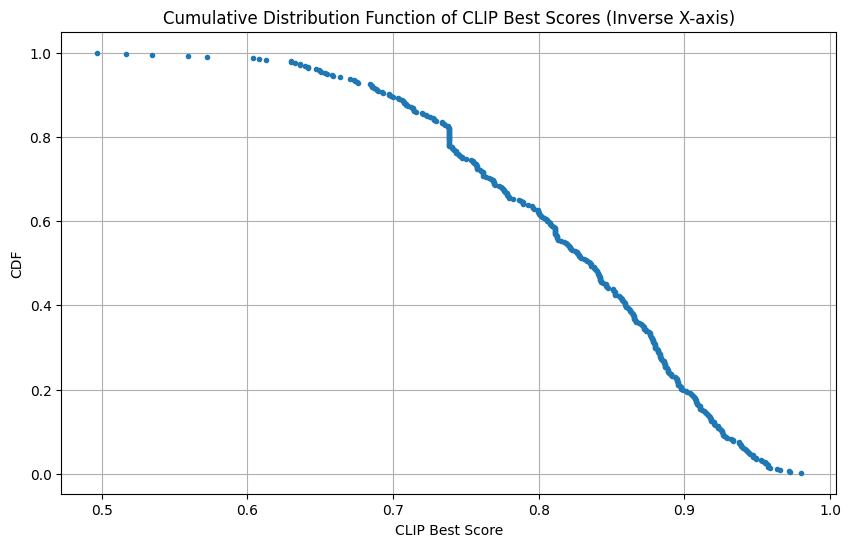

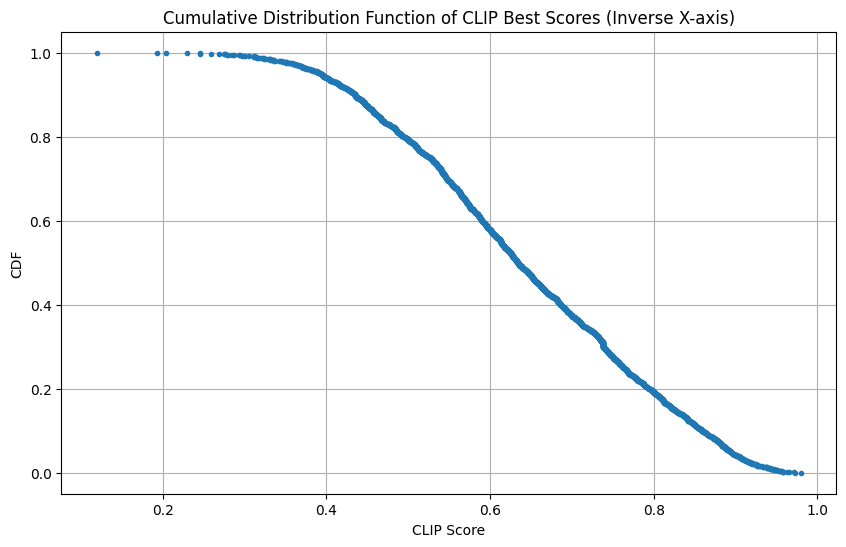

Portion of CLIP Best Scores > 0.7: 0.8922
Portion of CLIP Best Scores > 0.8: 0.6201
Portion of CLIP Best Scores > 0.9: 0.1961
Portion of CLIP Scores > 0.7: 0.3734
Portion of CLIP Scores > 0.8: 0.1924
Portion of CLIP Scores > 0.9: 0.0429


In [ ]:
# prompt: Draw the cumulative distribution function of clip_best_scores and clip_scores. The x array should be inverse. Also, calculate the portion of > 0.7, > 0.8 and > 0.9

import numpy as np
import matplotlib.pyplot as plt

# Ensure clip_best_scores and clip_scores are numpy arrays for easier manipulation
clip_best_scores = np.array(clip_best_scores)
clip_scores = np.array(clip_scores)
print(clip_best_scores)
print(clip_scores)

# Calculate CDF for clip_best_scores
# Sort data in descending order for inverse plot
sorted_best_scores = np.sort(clip_best_scores)[::-1]
sorted_scores = np.sort(clip_scores)[::-1]
cdf_best = np.arange(1, len(sorted_best_scores) + 1) / len(sorted_best_scores)
cdf = np.arange(1, len(sorted_scores) + 1) / len(sorted_scores)

# Plotting the inverse CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_best_scores, cdf_best, marker='.', linestyle='none')
plt.xlabel('CLIP Best Score')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of CLIP Best Scores (Inverse X-axis)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(sorted_scores, cdf, marker='.', linestyle='none')
plt.xlabel('CLIP Score')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of CLIP Best Scores (Inverse X-axis)')
plt.grid(True)
plt.show()

# Calculate the portion of scores > 0.7, > 0.8, and > 0.9 for clip_best_scores
portion_gt_07_best = np.sum(clip_best_scores > 0.7) / len(clip_best_scores)
portion_gt_08_best = np.sum(clip_best_scores > 0.8) / len(clip_best_scores)
portion_gt_09_best = np.sum(clip_best_scores > 0.9) / len(clip_best_scores)
portion_gt_07 = np.sum(clip_scores > 0.7) / len(clip_scores)
portion_gt_08 = np.sum(clip_scores > 0.8) / len(clip_scores)
portion_gt_09 = np.sum(clip_scores > 0.9) / len(clip_scores)

print(f"Portion of CLIP Best Scores > 0.7: {portion_gt_07_best:.4f}")
print(f"Portion of CLIP Best Scores > 0.8: {portion_gt_08_best:.4f}")
print(f"Portion of CLIP Best Scores > 0.9: {portion_gt_09_best:.4f}")
print(f"Portion of CLIP Scores > 0.7: {portion_gt_07:.4f}")
print(f"Portion of CLIP Scores > 0.8: {portion_gt_08:.4f}")
print(f"Portion of CLIP Scores > 0.9: {portion_gt_09:.4f}")


# If clip_scores were intended to be calculated differently or need plotting as well:
# You would need to modify the calculate_clip_score function or define how clip_scores
# are populated. Assuming you have a similar array `clip_scores` now:

# Example if you had clip_scores (uncomment and adjust if needed)
# clip_scores = np.array(...) # Populate clip_scores somehow

# If clip_scores exists and is populated:
# Calculate CDF for clip_scores
# sorted_scores = np.sort(clip_scores)[::-1]
# cdf_scores = np.arange(1, len(sorted_scores) + 1) / len(sorted_scores)

# Plotting the inverse CDF for clip_scores
# plt.figure(figsize=(10, 6))
# plt.plot(sorted_scores, cdf_scores, marker='.', linestyle='none', color='orange')
# plt.xlabel('CLIP Score')
# plt.ylabel('CDF')
# plt.title('Cumulative Distribution Function of CLIP Scores (Inverse X-axis)')
# plt.grid(True)
# plt.show()

# Calculate the portion of scores > 0.7, > 0.8, and > 0.9 for clip_scores
# if len(clip_scores) > 0:
#     portion_gt_07_scores = np.sum(clip_scores > 0.7) / len(clip_scores)
#     portion_gt_08_scores = np.sum(clip_scores > 0.8) / len(clip_scores)
#     portion_gt_09_scores = np.sum(clip_scores > 0.9) / len(clip_scores)

#     print(f"Portion of CLIP Scores > 0.7: {portion_gt_07_scores:.4f}")
#     print(f"Portion of CLIP Scores > 0.8: {portion_gt_08_scores:.4f}")
#     print(f"Portion of CLIP Scores > 0.9: {portion_gt_09_scores:.4f}")
# else:
#     print("CLIP Scores array is empty.")

In [ ]:
# prompt: clean RAM and VRAM

# Clean RAM
del text_dataset
del dataset
del first_item
del seq_beforeHug
import gc
gc.collect()

In [ ]:
# Clean VRAM
from numba import cuda
cuda.select_device(0)
cuda.close()

In [ ]:
!pip freeze > /content/requirements.txt